# 1. データの確認

## 1-1. 気象データの整理

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio']

In [2]:
#---アメダスCSVファイルを読み込む関数
# 引数
# - file : ファイル名
# - all_params : ファイルに含まれるカラムの名前リスト
# - params : 最終的に欲しいカラムの名前リスト
# - start_index : データの始まりの行（最初の行は0行目と数える）
def Read_AMeDAS_CSV(file, all_params, params, start_index=6):
    # カラム名を指定してファイルを読み込む
    # データがスタートする行を指定する
    data = pd.read_csv(file, encoding="shift-jis", names=all_params, skiprows=range(start_index))

    # 初めて読み込むときは、カラム確認のためこの工程を削除
    # 品質番号が8or5以外だったら、品質が不十分としてその気象要素の値を欠損値にする
    for col in params:
        if col + "_q" in all_params:
            data[col] = data[col].mask(data[col+"_q"] < 5, np.nan)
    
    # 必要なカラムだけ残して返す
    return data[params]

In [3]:
# 現象の有無はカラム名を気象要素名_info、品質番号は気象要素名_q、均質番号は気象要素名_iとすることで識別できるようカラム名を付ける。
# 全カラム名リスト
all_columns1 = ["年月日","平均気温","平均気温_q","平均気温_i",
               "最高気温","最高気温_q","最高気温_i",
               "最低気温","最低気温_q","最低気温_i",
               "降水量","降水量_info","降水量_q","降水量_i",
               "日照時間","日照時間_info","日照時間_q","日照時間_i",
               "平均風速","平均風速_q","平均風速_i",
               "最大風速","最大風速_q",
               "最大風速の風向","最大風速の風向_q","最大風速の風向_i",
               '平均湿度','平均湿度_q','平均湿度_i',
               "最大1時間降水量","最大1時間降水量_info","最大1時間降水量_q","最大1時間降水量_i",
               "最大瞬間風速","最大瞬間風速_q",
               "最大瞬間風速の風向","最大瞬間風速の風向_q","最大瞬間風速の風向_i",
               '最小相対湿度','最小相対湿度_q','最小相対湿度_i',
               '平均雲量','平均雲量_q','平均雲量_i',
                '積雪量','積雪量_info','積雪量_q','積雪量_i'
               ]

# 必要なカラム名リスト
select_columns1 = ["年月日","平均気温","最高気温","最低気温", "降水量","日照時間","平均風速","最大風速",
                   '平均湿度',"最大1時間降水量","最大瞬間風速",'最小相対湿度','平均雲量','積雪量']

# 読み込み
file1 = "Tokyo_20201227_20211226.csv"
df_w_2021 = Read_AMeDAS_CSV(file1, all_columns1, select_columns1)
df_w_2021.head()

,年月日,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,平均雲量,積雪量
0,2020/12/27,7.8,12.7,3.4,0.0,6.8,1.9,3.9,59,0.0,7.4,30,7.8,0
1,2020/12/28,8.5,13.5,6.2,0.0,4.0,1.6,3.5,72,0.0,5.6,49,5.5,0
2,2020/12/29,8.7,13.1,4.3,0.0,4.5,1.6,3.4,66,0.0,6.1,51,5.8,0
3,2020/12/30,6.9,12.3,2.7,1.5,1.6,3.4,9.5,68,1.5,20.8,36,10.0,0
4,2020/12/31,3.4,7.6,-0.2,0.0,8.9,3.3,8.8,34,0.0,15.4,21,0.8,0


In [4]:
# 読み込み
file2 = "Tokyo_20211229_20221228.csv"
df_w_2022 = Read_AMeDAS_CSV(file2, all_columns1, select_columns1)
df_w_2022.head()

,年月日,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,平均雲量,積雪量
0,2021/12/29,4.2,8.9,0.9,0.0,7.8,1.6,3.9,54,0.0,6.1,42,7.0,0
1,2021/12/30,6.5,14.5,0.6,0.0,7.5,2.0,7.1,53,0.0,12.1,25,2.3,0
2,2021/12/31,3.2,6.0,0.1,0.0,3.7,3.0,6.5,51,0.0,12.0,37,4.3,0
3,2022/1/1,3.4,7.8,-1.0,0.0,8.8,4.1,7.2,32,0.0,13.8,21,0.0,0
4,2022/1/2,3.5,7.9,0.4,0.0,6.2,2.0,5.2,52,0.0,9.8,33,2.5,0


In [5]:
df_w_2021.describe().round(2)

,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,平均雲量,積雪量
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.0
mean,16.71,21.41,12.87,5.63,5.70,2.72,5.77,68.95,1.96,10.31,48.05,6.45,0.0
std,7.36,7.38,7.84,16.71,4.05,0.83,1.71,16.76,4.80,3.62,18.77,3.38,0.0
min,2.30,5.70,-2.40,0.00,0.00,1.20,2.50,31.00,0.00,3.40,10.00,0.00,0.0
25%,10.60,15.80,6.20,0.00,1.20,2.10,4.70,57.00,0.00,7.80,34.00,4.00,0.0
50%,16.70,21.30,12.70,0.00,6.70,2.60,5.50,71.00,0.00,9.70,48.00,7.30,0.0
75%,22.70,27.40,19.30,2.00,9.10,3.10,6.60,80.00,1.00,12.20,60.00,10.00,0.0
max,31.00,36.80,27.20,138.50,13.20,6.10,12.40,100.00,31.50,24.50,100.00,10.00,0.0


In [6]:
df_w_2022.describe().round(2)

,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,平均雲量,積雪量
count,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00,365.00
mean,16.43,21.12,12.68,4.43,5.57,2.68,5.60,70.01,1.72,9.88,48.53,6.66,0.03
std,8.30,8.40,8.56,12.34,4.06,0.80,1.46,15.65,4.80,2.95,17.64,3.30,0.53
min,0.70,2.60,-3.50,0.00,0.00,1.40,2.60,29.00,0.00,4.10,15.00,0.00,0.00
25%,8.50,13.70,4.60,0.00,1.00,2.10,4.50,60.00,0.00,7.60,33.00,4.00,0.00
50%,16.40,20.90,12.10,0.00,6.10,2.50,5.40,72.00,0.00,9.40,48.00,7.50,0.00
75%,23.50,27.80,20.30,1.50,9.00,3.00,6.50,81.00,1.00,11.70,61.00,9.80,0.00
max,31.60,37.00,28.20,112.50,13.30,5.80,9.50,100.00,38.50,20.20,98.00,10.00,10.00


In [7]:
df_w_2021.isnull().sum()

年月日         0
平均気温        0
最高気温        0
最低気温        0
降水量         0
日照時間        0
平均風速        0
最大風速        0
平均湿度        0
最大1時間降水量    0
最大瞬間風速      0
最小相対湿度      0
平均雲量        0
積雪量         0
dtype: int64

In [8]:
df_w_2022.isnull().sum()# 気象データに欠損値がないことがわかった

年月日         0
平均気温        0
最高気温        0
最低気温        0
降水量         0
日照時間        0
平均風速        0
最大風速        0
平均湿度        0
最大1時間降水量    0
最大瞬間風速      0
最小相対湿度      0
平均雲量        0
積雪量         0
dtype: int64

In [9]:
# 年月日をdatetime型にしておく
df_w_2021['年月日'] = pd.to_datetime(df_w_2021['年月日'])
df_w_2022['年月日'] = pd.to_datetime(df_w_2022['年月日'])

## 1-2. コロナ感染者数データの確認

In [10]:
df_p = pd.read_csv('newly_confirmed_cases_daily.csv')
df_p.head()

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
0,2020/1/16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020/1/17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020/1/18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020/1/19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020/1/20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Dateをdatetime型に型変換した後、必要があるデータに絞り込む
df_p['Date'] = pd.to_datetime(df_p['Date'])
df_p = df_p.query('"2021-01-01" <= Date< "2023-01-01"')
df_p.head()

,Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,...,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
351,2021-01-01,3249,98,10,4,30,3,3,12,42,...,6,6,158,1,20,30,11,25,15,48
352,2021-01-02,3055,77,4,2,4,0,1,13,20,...,6,7,124,5,28,26,11,31,2,11
353,2021-01-03,3136,68,10,3,20,3,6,14,52,...,7,11,104,3,30,22,9,30,27,27
354,2021-01-04,3333,93,10,0,18,3,5,25,32,...,9,2,128,23,24,34,10,33,12,36
355,2021-01-05,4936,79,7,6,37,8,5,25,67,...,25,7,187,10,55,63,16,37,22,53


In [12]:
df = df_p.loc[:, ['Date', 'Tokyo']]
df.head()

,Date,Tokyo
351,2021-01-01,793
352,2021-01-02,829
353,2021-01-03,826
354,2021-01-04,905
355,2021-01-05,1315


In [13]:
df.tail()

,Date,Tokyo
1076,2022-12-27,22063
1077,2022-12-28,20243
1078,2022-12-29,18372
1079,2022-12-30,14525
1080,2022-12-31,11189


In [14]:
df.describe().round(2)

,Tokyo
count,730.00
mean,5380.29
std,7375.39
min,5.00
25%,436.00
50%,2186.50
75%,7936.50
max,40395.00


In [15]:
df.isnull().sum()# 感染者データに欠損値がないことがわかった

Date     0
Tokyo    0
dtype: int64

In [16]:
df.dtypes

Date     datetime64[ns]
Tokyo             int64
dtype: object

In [17]:
# 使いそうな要素を抽出
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday
df.head()

,Date,Tokyo,year,month,day,weekday
351,2021-01-01,793,2021,1,1,4
352,2021-01-02,829,2021,1,2,5
353,2021-01-03,826,2021,1,3,6
354,2021-01-04,905,2021,1,4,0
355,2021-01-05,1315,2021,1,5,1


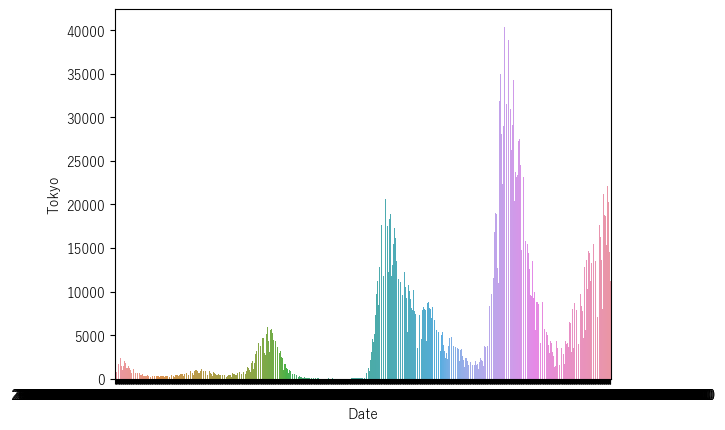

In [18]:
sns.barplot(x='Date', y='Tokyo', data=df);

- グラフの右側（2022年）の方が感染者数が多いことが分かる
- 山があるのは何かしらの要因がありそう

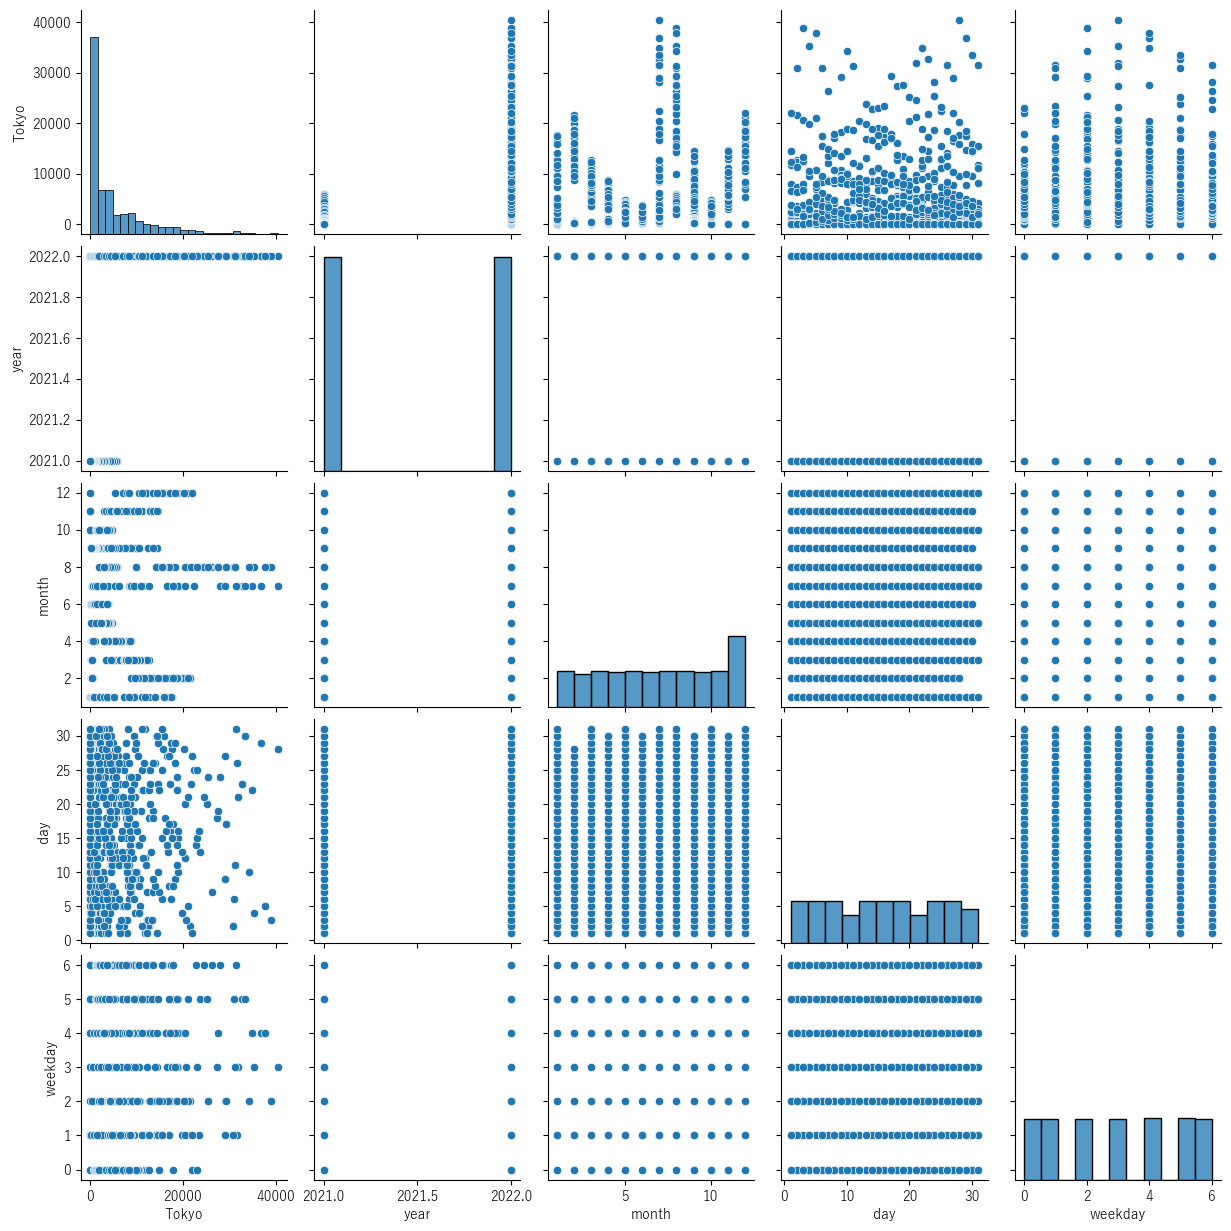

In [19]:
sns.pairplot(df);

In [20]:
df.corr()

,Tokyo,year,month,day,weekday
Tokyo,1.000000,6.100192e-01,7.592504e-02,4.595108e-02,0.044492
year,0.610019,1.000000e+00,7.923551e-13,9.339728e-14,0.000685
month,0.075925,7.923551e-13,1.000000e+00,1.189318e-02,-0.003891
day,0.045951,9.339728e-14,1.189318e-02,1.000000e+00,0.003415
weekday,0.044492,6.852851e-04,-3.891284e-03,3.415294e-03,1.000000


- 全体を通しての感染者数は、年度以外の相関はほとんどなさそう（2022年の方が感染者数が多い）

# 2. コロナ感染者数の傾向をみる 

## 2-1. 月ごとに調べる

In [2]:
df_month = pd.pivot_table(df, index='month', columns='year', values='Tokyo', aggfunc=np.sum)# 各月の合計感染者数をもとめる
df_month['total'] = df_month[2021] + df_month[2022]
df_month

year,2021,2022,total
month,,,
1,40367,194563,234930
2,10997,416171,427168
3,9310,256738,266048
4,18075,188021,206096
5,21871,101664,123535
6,12977,58556,71533
7,44448,567728,612176
8,129193,757621,886814
9,31929,244023,275952


In [3]:
#---積み立て棒グラフを描画する関数
# 引数
# - data : 感染者数をグルーピングしたデータフレーム
# - param : x軸に使う要素
def stack_bar(data, param):    
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(1,1,1)
    ax.bar(data.index, data[2021], label='2021')
    ax.bar(data.index, data[2022], bottom=data[2021],label='2022')
    ax.set_xticks(range(0, data.index.value_counts().sum()+1))
    ax.set_xlabel(param, fontsize=15)
    ax.set_ylabel('感染者数', fontsize=15)
    ax.legend()
    plt.show();

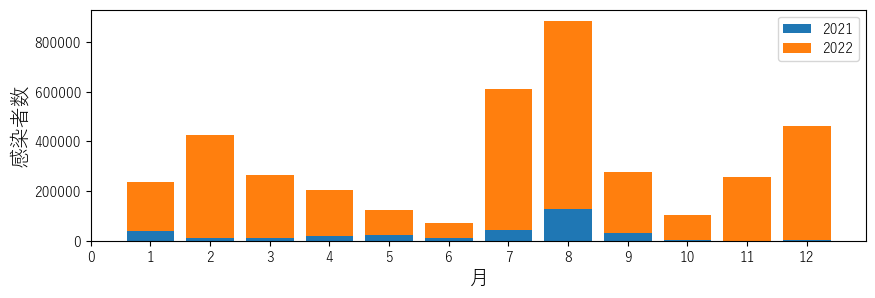

In [4]:
# 2年分まとめて集計
stack_bar(df_month, '月')

- 感染者数は2022年に特に多い
- 感染者数は7, 8月、それに次いで12, 2月に多い傾向がある
- 逆に、夏の直前の5，6月は少なく、夏の後の9，10月もやや少ない傾向がある

In [5]:
# 関数用に準備
year = [2021, 2022]

In [6]:
#---各年の棒グラフを描画する関数
# 引数
# - data : 感染者数をグルーピングしたデータフレーム
# - param : x軸に使う要素
def bar_plot(data, param): 
    fig = plt.figure(figsize=(20,12))
    for i, c in enumerate(year):
        ax = fig.add_subplot(2,2,i+1)
        ax.bar(data.index, data[c])
        ax.set_xticks(range(0, data.index.value_counts().sum()+1))
        ax.set_title(str(c)+'年', fontsize=15)
        ax.set_xlabel(param, fontsize=15)
        ax.set_ylabel('感染者数', fontsize=15)
    plt.show();

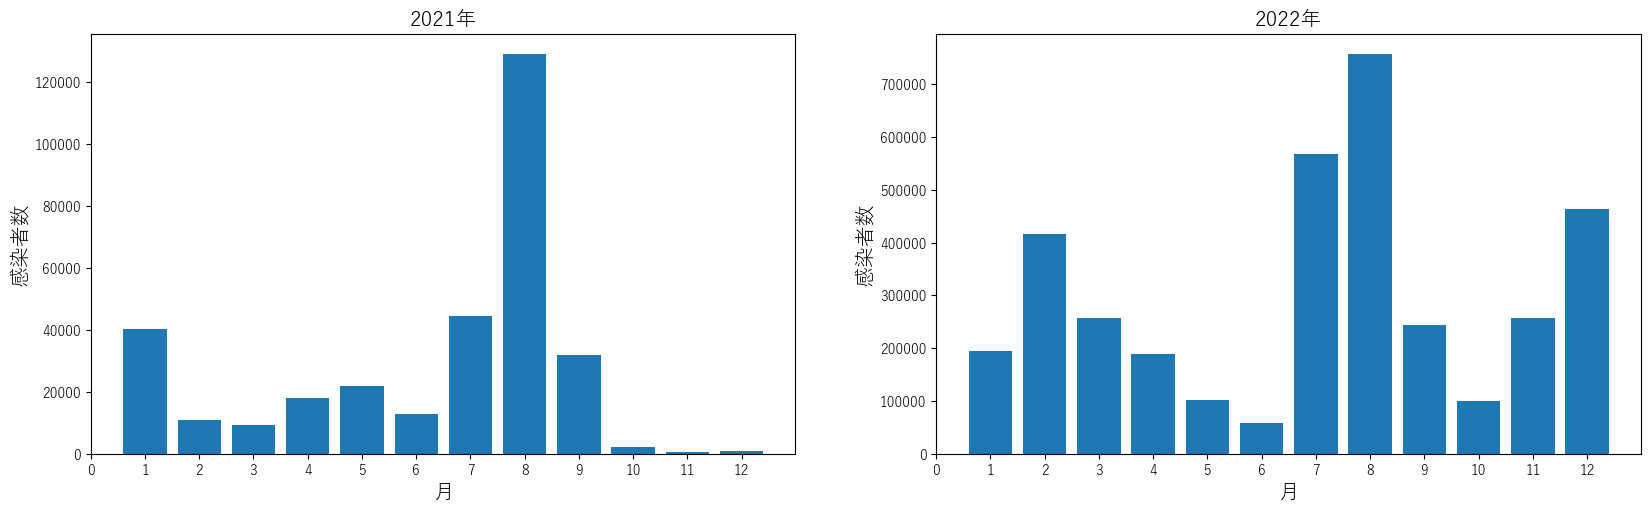

In [7]:
bar_plot(df_month, '月')

- y軸のスケールが違うことに注意
- 2年とも8月が一番多く、7月がその次に多い
- 2021年の12月から2022年の1月にかけて、感染者数が急増した
- 2022年の6月から7月にかけても感染者数が急増している

## 2-2. 曜日毎に調べる

In [8]:
df_weekday = pd.pivot_table(df, index='weekday', columns='year', values='Tokyo', aggfunc=np.sum)# 週毎の合計感染者数をもとめる
df_weekday['total'] = df_weekday[2021] + df_weekday[2022]
df_weekday

year,2021,2022,total
weekday,,,
0,28853,325806,354659
1,42784,519423,562207
2,51039,603426,654465
3,55074,588825,643899
4,51658,552258,603916
5,51160,540631,591791
6,42180,474493,516673


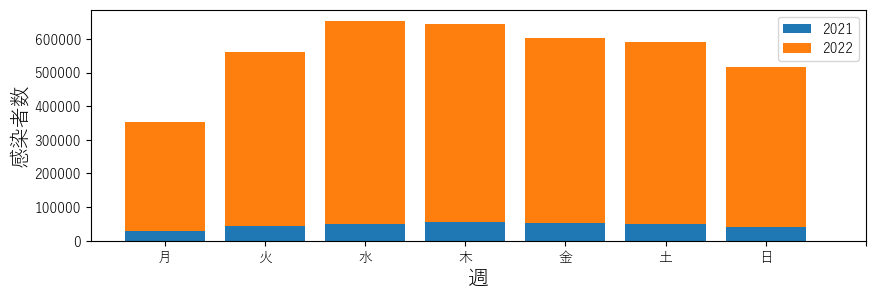

In [9]:
# 2年分まとめて集計
df_weekday.index = ['月', '火', '水', '木', '金', '土', '日']
stack_bar(df_weekday, '週')

- 月曜日が少ない
- 水、木曜日がやや多い

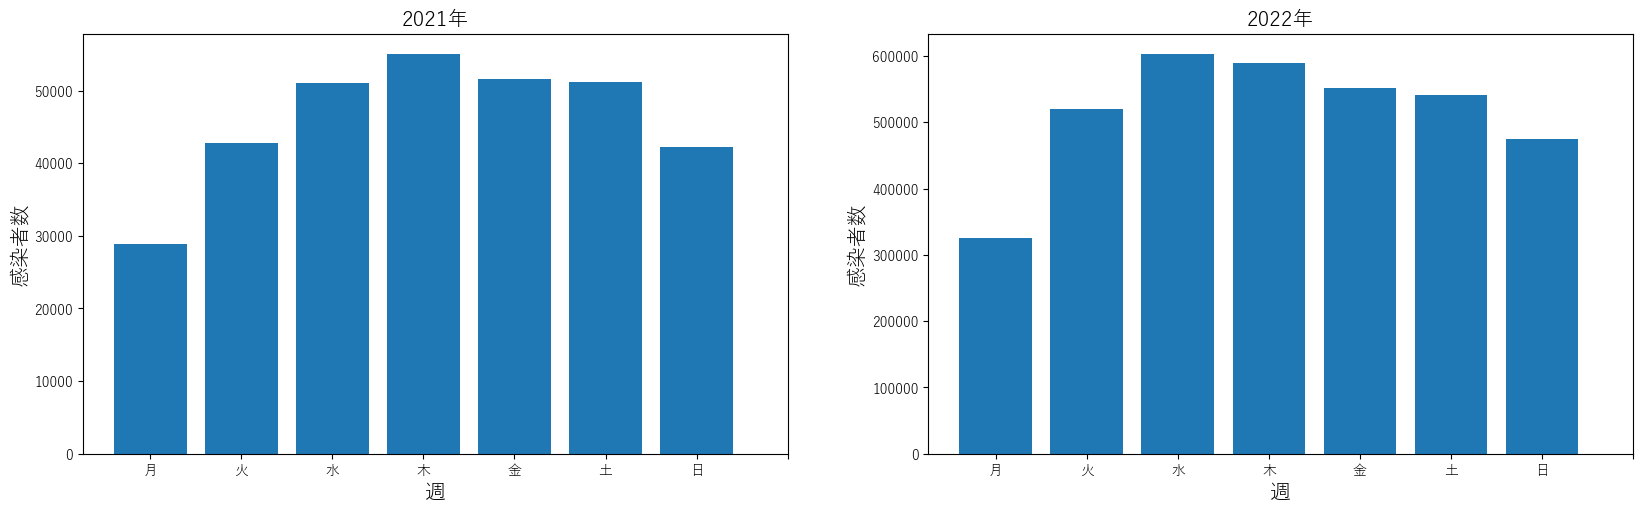

In [10]:
bar_plot(df_weekday, '週')

- y軸のスケールが違うことに注意
- 2年とも月曜日が少ない

## 2-3. 日毎に調べる

In [11]:
# --- 1年分の日数を月ごとに集計する関数
# 引数
# - year : 調べたい年度
# - df_year : 調べたい年度のデータフレーム
import calendar
def daily_bar(year, df_year):
    # 年間を通しての月ごとの日数は[0, 31], [31, 59], [59, 90]...　と表せる
    # 各リストの右の値は月ごとの累積日数、左の値は前の月の累積日数で表せる
    
    # 後に累積値をzip関数で結合させるために、あらかじめ累積日数が計算できるリストを用意する
    monthly_count = [calendar.monthrange(year, i)[1] for i in range(1, 13)]# 毎月の日数を抽出
    monthly_count_lost_12 = [calendar.monthrange(year, i)[1] for i in range(1, 12)]
    monthly_count_lost_12.insert(0, 0)# [0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30]

    # 月ごとの累積日数
    daily_count = 0
    result_1 = []
    for i in monthly_count:
        daily_count += i
        result_1.append(daily_count)
    
    # 月ごとの前の月の累積日数
    daily_count_lost_12 = 0
    result_2 = []
    for i in monthly_count_lost_12:
        daily_count_lost_12 += i
        result_2.append(daily_count_lost_12)

    result = []
    for s, t in zip(result_2, result_1):
        result.append(df_year.iloc[s: t])
    fig, ax = plt.subplots(3, 4,figsize=(24, 12))
    for p, q in enumerate(result):
        ax[p // 4, p % 4].bar(q['day'], q['Tokyo'])
        ax[p // 4, p % 4].set_xlabel(str(q['year'].iloc[0])+'年, '+str(q['month'].iloc[0])+'月', fontsize=15)
        ax[p // 4, p % 4].set_ylabel('感染者数', fontsize=15)
    plt.show();

In [12]:
# 関数用にデータを1年ごとに分割
df_2021 = df.iloc[0: 365]
df_2022 = df.iloc[365: 730]

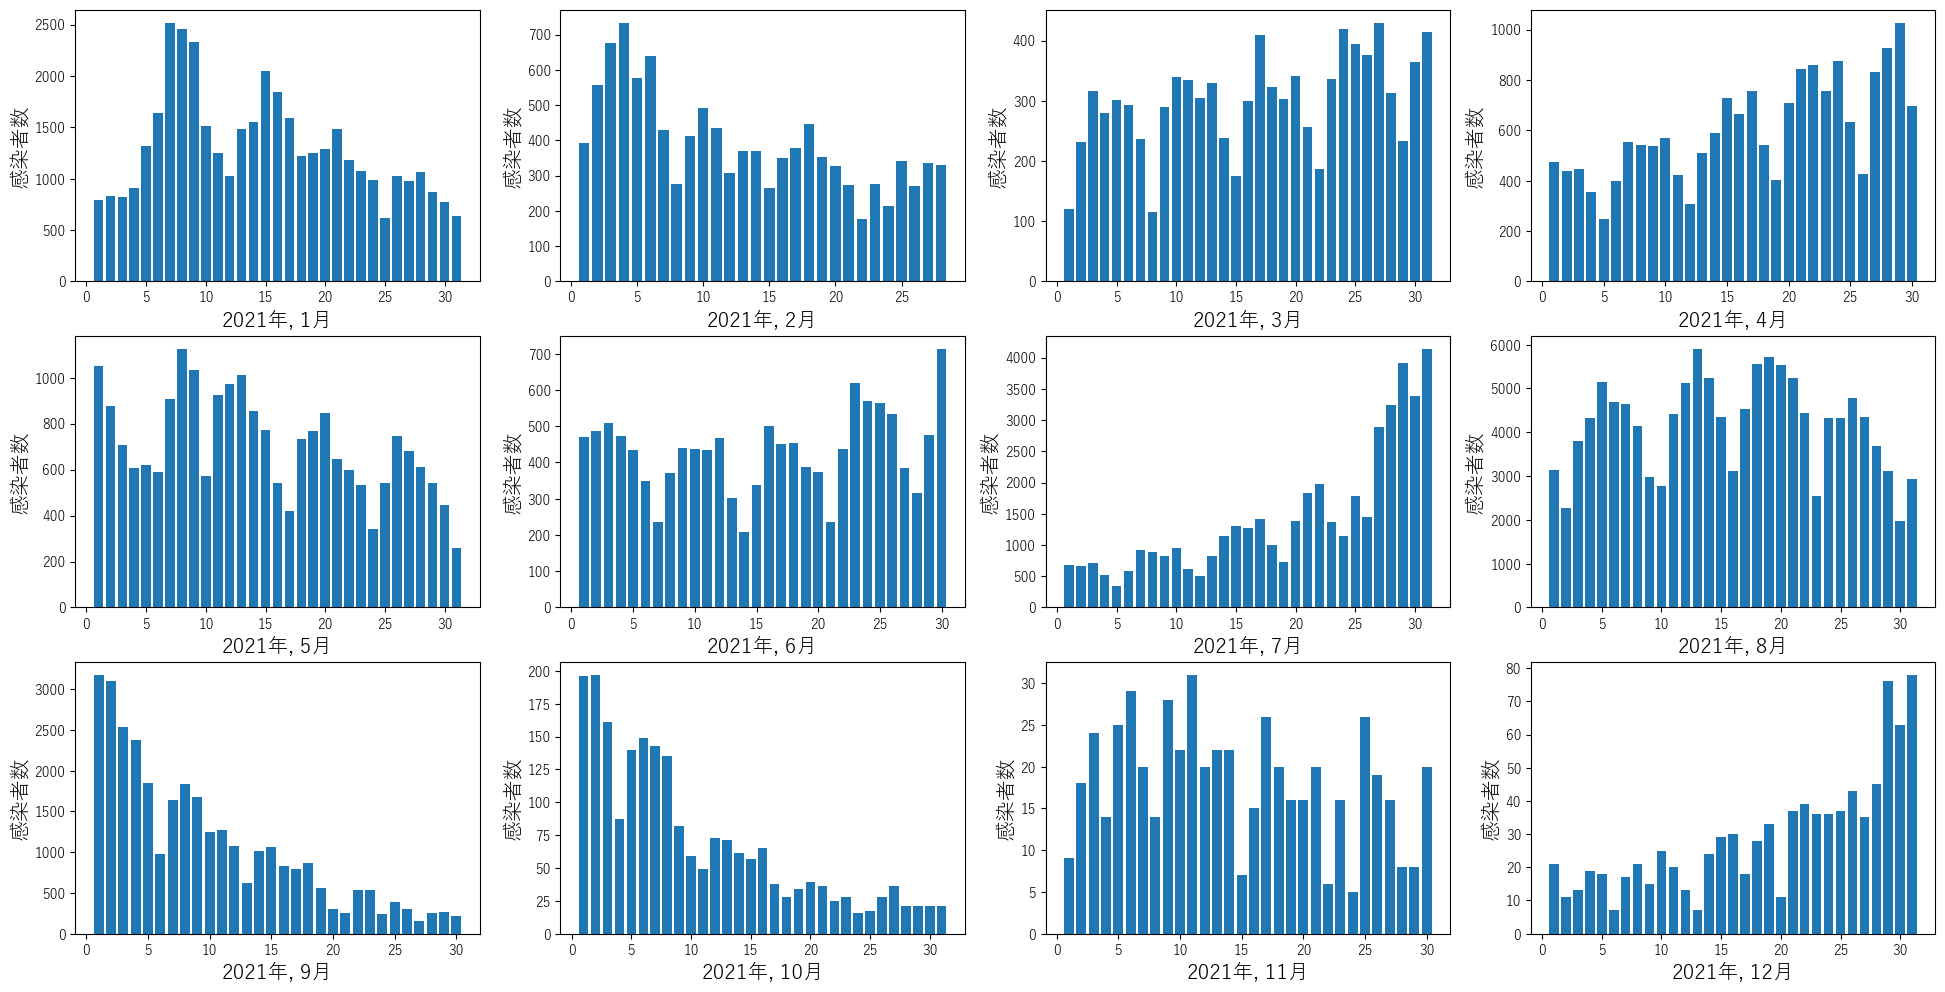

In [13]:
daily_bar(2021, df_2021)

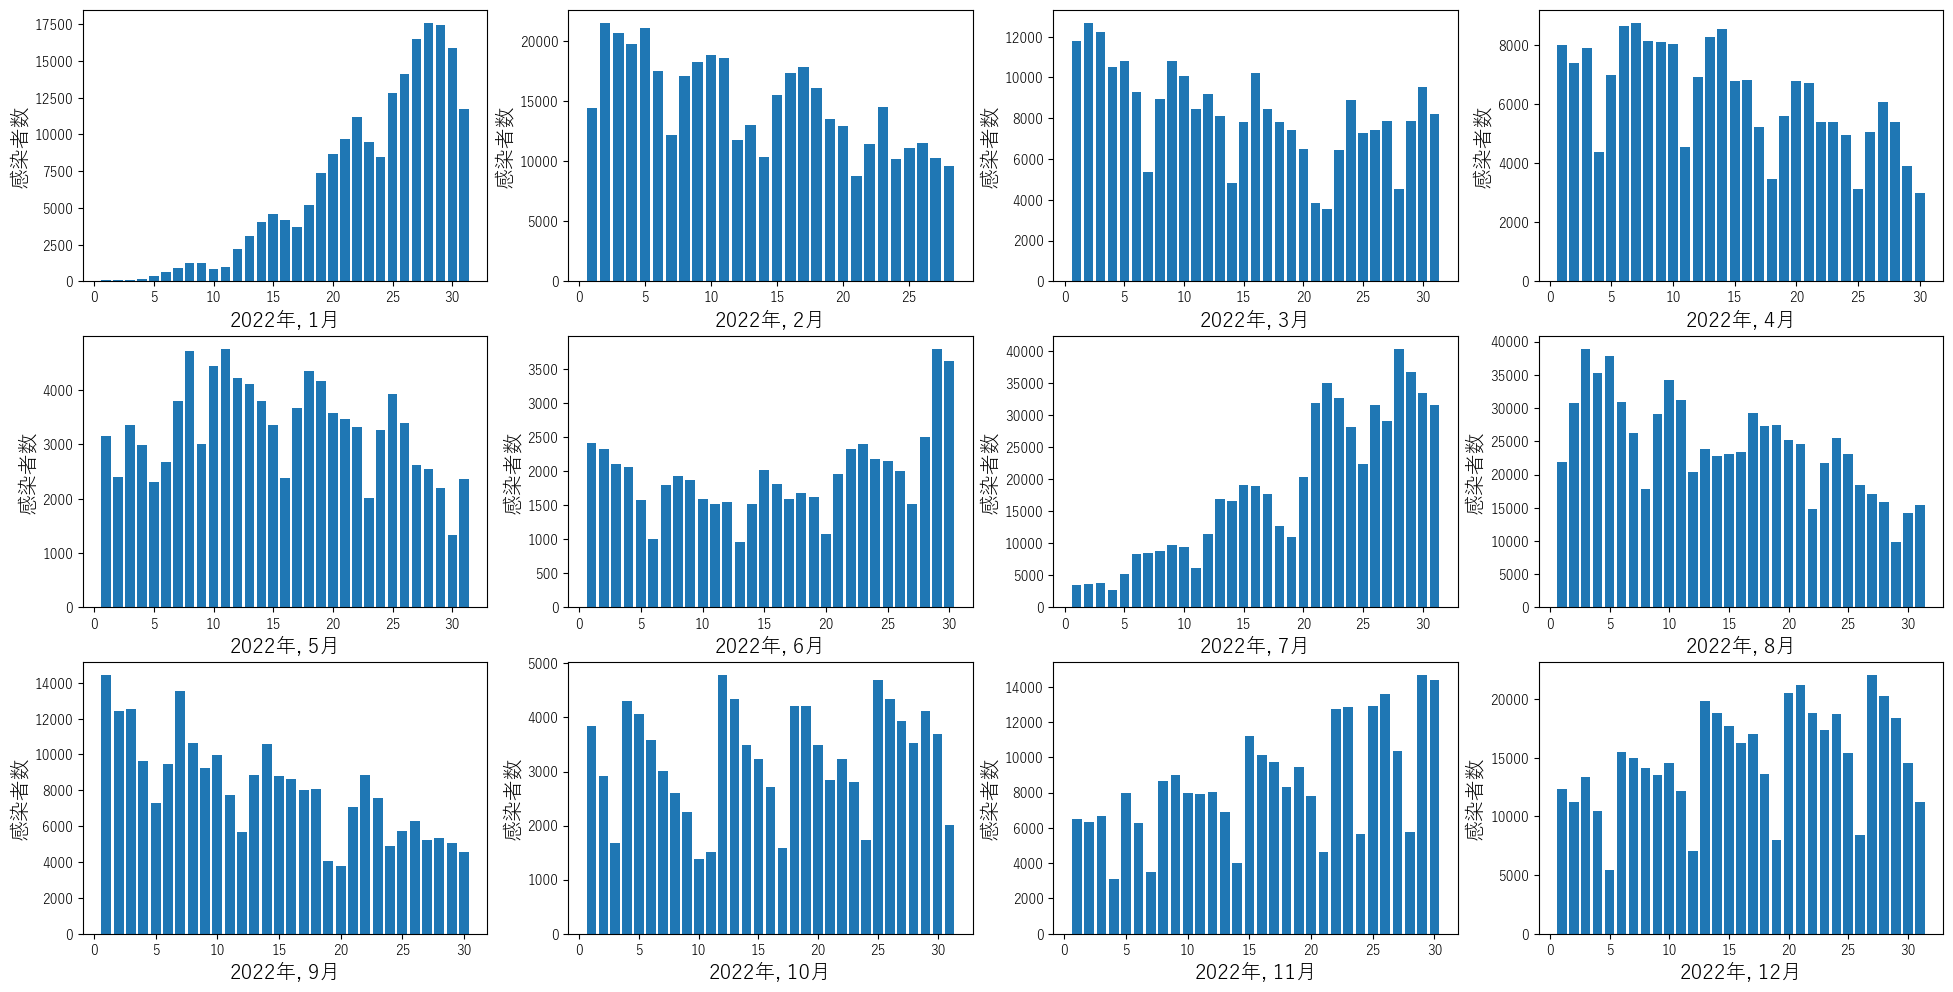

In [14]:
daily_bar(2022, df_2022)

- 2年ともy軸のスケールが異なることに注意
- 感染者数の増減には山が多く存在することがわかる
- 1か月を通して7月が増加傾向、9月が減少傾向であることが2021, 2022年両方で共通している

## ここまでのまとめ

1. 年ごと
- 2021年と2022年では感染者数に差がある
    - 要因は2021年よりも2022年の方が全国的な感染者が多かったことと、ウイルスの特性によるものだと考えられる (気象要素が要因とは考えにくい)
    - 2年間を通しで集計すると気象要素と感染者数の関係を正しく調べることができないため、**後に年ごとに分割**する

2. 月ごと
- 感染者数は夏(7, 8月)や冬(2, 12月)に多く、雨季(5, 6, 9, 10月)に少ない傾向がある
    - 例年、東京での夏や冬は、ほかの時期に比べ降水量が少ない傾向がある
    - 雨季の感染者数が少ないことから、人出には降水が与える影響が大きいと考えられる

3. 曜日ごと
- 月曜日に感染者数が少ない
    - 他の曜日はそれほど差がないことから、月曜日は気象要素以外の要因が感染者数の増減に強く関わっている可能性が考えられる
    - 今後の分析ではその影響を考慮し、**月曜日のデータのみ除く**ことにする

4. 日ごと
- 感染者数の増減には山が多く存在する
    - 周期性と呼べるかは微妙
    - 今回は特に考慮しない
- 7月が増加傾向、9月が減少傾向であることが2021, 2022年両方で共通している
    - 例年、7月の後半は梅雨明けにより降水量が少なくなり、9月の後半は太平洋高気圧の張り出しが弱まることで雨の日が多くなる
    - 雨季に感染者数が減少する可能性があると考えられる

# 3. 気象データと感染者数の傾向をみる

## 3-1. 気象データの整理

In [2]:
# 2021年のデータを、年月日のカラムのみ5日分ずらす（理由は後述）
date_2021 = pd.date_range('2021-01-01', '2021-12-31')
df_w_2021['年月日'] = date_2021

In [3]:
df_w_2021.query('積雪量 > 0')

,年月日,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,平均雲量,積雪量


降雪日がないため、後にカラムごと削除

In [4]:
df_w_2021.drop(columns=['積雪量', '平均雲量'], inplace=True)
df_w_2021.head()

,年月日,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度
0,2021-01-01,7.8,12.7,3.4,0.0,6.8,1.9,3.9,59,0.0,7.4,30
1,2021-01-02,8.5,13.5,6.2,0.0,4.0,1.6,3.5,72,0.0,5.6,49
2,2021-01-03,8.7,13.1,4.3,0.0,4.5,1.6,3.4,66,0.0,6.1,51
3,2021-01-04,6.9,12.3,2.7,1.5,1.6,3.4,9.5,68,1.5,20.8,36
4,2021-01-05,3.4,7.6,-0.2,0.0,8.9,3.3,8.8,34,0.0,15.4,21


- 日照時間と天気概況で晴れか曇りを判定するため、平均雲量は削除 
    - 平均雲量は1日に4回しか観測されないため、人流に影響を与える気象要素として適切でないと判断した

- 気象データはウイルスの潜伏期間を考慮して**感染者数が判明した5日前**のデータを参照する
    - （例: 9月7日に発表された感染者は9月2日に感染した可能性が高いため、9月7日の感染者数は9月2日の気象状況が影響したと考える）
    - そのため、今回は年月日データを5日分後ろにずらすことで、感染者数の発表日が感染日の気象データに相当するように調整した

In [5]:
# 2022年のデータは、年月日のカラムのみ3日分ずらす（ウイルスの特性を考慮）
date_2022 = pd.date_range('2022-01-01', '2022-12-31')
df_w_2022['年月日'] = date_2022

In [6]:
df_w_2022.query('積雪量 > 0')

,年月日,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,平均雲量,積雪量
8,2022-01-09,0.7,2.6,-1.7,6.5,0.0,2.0,3.7,74,2.0,6.1,46,7.8,10
43,2022-02-13,2.3,6.1,0.6,27.0,0.0,2.6,4.5,90,3.5,8.7,60,10.0,2


積雪した日が少ないため、後にカラムごと削除

In [7]:
df_w_2022.drop(columns=['積雪量', '平均雲量'], inplace=True) # 平均雲量の削除理由は2021年と同じ
df_w_2022.head()

,年月日,平均気温,最高気温,最低気温,降水量,日照時間,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度
0,2022-01-01,4.2,8.9,0.9,0.0,7.8,1.6,3.9,54,0.0,6.1,42
1,2022-01-02,6.5,14.5,0.6,0.0,7.5,2.0,7.1,53,0.0,12.1,25
2,2022-01-03,3.2,6.0,0.1,0.0,3.7,3.0,6.5,51,0.0,12.0,37
3,2022-01-04,3.4,7.8,-1.0,0.0,8.8,4.1,7.2,32,0.0,13.8,21
4,2022-01-05,3.5,7.9,0.4,0.0,6.2,2.0,5.2,52,0.0,9.8,33


2022年はオミクロン株が流行したため、オミクロン株の潜伏期間が3日であることを考慮して**3日分ずらす**

## 3-2. 日照時間、降水から天気を予測する
天気を予測する際、考慮する点は以下の通り
- 突発的で強い降水かそうでないかで天気を区別する
    - ゲリラ豪雨のような降水と、連続的な降水とでは人流に与える影響が異なると予想する
    - 日照時間、降水量、最大1時間降水量からその日の天気を判断する
    - ゲリラ豪雨でないと判断した日は、降水の有無でその日の天気を判断する

- 1日の晴れ、曇りは日照時間から判断する
    - 夜が晴れか曇りかの違いは人流に影響を与えないと予想する
    - 月ごとの最大日照時間とその日の日照時間の比が0.2未満であれば曇り、それ以外は晴れとする

In [8]:
df_w = df_w_2021.append(df_w_2022)

In [9]:
# 月ごとの最大日照時間から、晴れていた時間を推測する
df_w['month'] = df_w['年月日'].dt.month
max_sun_hour = df_w.groupby('month')[['日照時間']].max().reset_index()
max_sun_hour.columns = ['month', '日照時間_max']
max_sun_hour

,month,日照時間_max
0,1,9.2
1,2,10.7
2,3,11.6
3,4,12.4
4,5,12.6
5,6,13.3
6,7,13.2
7,8,12.1
8,9,11.8
9,10,10.4


月ごとの最大日照時間は、特に異常値は見られない

In [10]:
# 月ごとの最大日照時間とその日の日照時間の比を求める
df_w = pd.merge(df_w, max_sun_hour, on='month', how='left')
df_w['日照時間_rate'] = (df_w['日照時間'] / df_w['日照時間_max']).round(2)
df_w.drop(columns=['日照時間', 'month', '日照時間_max'], inplace=True)
df_w.head()

,年月日,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate
0,2021-01-01,7.8,12.7,3.4,0.0,1.9,3.9,59,0.0,7.4,30,0.74
1,2021-01-02,8.5,13.5,6.2,0.0,1.6,3.5,72,0.0,5.6,49,0.43
2,2021-01-03,8.7,13.1,4.3,0.0,1.6,3.4,66,0.0,6.1,51,0.49
3,2021-01-04,6.9,12.3,2.7,1.5,3.4,9.5,68,1.5,20.8,36,0.17
4,2021-01-05,3.4,7.6,-0.2,0.0,3.3,8.8,34,0.0,15.4,21,0.97


In [11]:
# 日中は晴れていたが、突発的で強い雨が降った日を調べる
# 1時間雨量10mmはやや強い雨とされるので今回はこれを指標にした
df_sunny_gerira_rain = df_w.query('(日照時間_rate >= 0.2) & (最大1時間降水量 >= 10.0)')
df_sunny_gerira_rain

,年月日,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate
92,2021-04-03,17.5,23.4,13.3,34.5,2.7,6.8,84,19.5,12.1,56,0.85
112,2021-04-23,16.4,22.0,12.1,15.0,4.2,8.7,51,18.0,15.6,15,0.98
180,2021-06-30,23.3,27.5,20.7,19.0,2.7,5.6,79,19.0,9.8,57,0.29
196,2021-07-16,24.7,31.8,21.2,17.5,1.7,9.0,91,17.0,17.2,65,0.23
212,2021-08-01,24.9,29.8,21.3,34.5,3.1,6.1,84,16.0,11.9,60,0.22
247,2021-09-05,26.9,32.4,21.2,17.0,2.9,6.0,76,11.5,9.6,56,0.25
303,2021-10-31,15.0,20.4,11.2,30.0,2.8,5.5,85,10.5,12.7,59,0.58
339,2021-12-06,15.5,20.3,9.7,54.5,3.6,10.4,67,20.0,19.1,27,0.62
479,2022-04-25,19.2,26.2,13.5,29.0,2.4,6.3,82,15.5,10.6,49,0.65
629,2022-09-22,27.1,30.8,24.7,18.5,5.6,9.5,92,12.5,18.5,73,0.20


これらの日の降水は人流に与える影響が少ないとし、すべて晴れとする

In [12]:
#---天気カテゴリーの推定をする関数
# 引数
# - sun_rate : 日照時間rate
# - prcp : 降水量
# - prcp_max : 最大1時間降水量
def Estimate_Weather(sun_rate, prcp, prcp_max):
    if prcp > 0.0 and ~((sun_rate >= 0.2) & (prcp_max >= 10.0)):
        return 'Rainy'
    elif sun_rate < 0.2:
        return 'Cloudy'
    else:
        return 'Sunny'

In [13]:
df_w['天気'] = df_w[['日照時間_rate','降水量','最大1時間降水量']].apply(lambda x: Estimate_Weather(x[0],x[1],x[2]), axis=1)
df_w.head()

,年月日,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate,天気
0,2021-01-01,7.8,12.7,3.4,0.0,1.9,3.9,59,0.0,7.4,30,0.74,Sunny
1,2021-01-02,8.5,13.5,6.2,0.0,1.6,3.5,72,0.0,5.6,49,0.43,Sunny
2,2021-01-03,8.7,13.1,4.3,0.0,1.6,3.4,66,0.0,6.1,51,0.49,Sunny
3,2021-01-04,6.9,12.3,2.7,1.5,3.4,9.5,68,1.5,20.8,36,0.17,Rainy
4,2021-01-05,3.4,7.6,-0.2,0.0,3.3,8.8,34,0.0,15.4,21,0.97,Sunny


## 3-3. 気象データと感染者数データを結合し集計、可視化する

### 3-3-1. 天気と感染者数データをクロス集計

In [14]:
# 感染者数のデータと気象データを結合
df_w = df_w.rename(columns={'年月日': 'Date'})
df_m = pd.merge(df_w, df, on='Date', how='left')
df_m = df_m.rename(columns={'Tokyo': '総感染者数'})
df_m.head()

,Date,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate,天気,総感染者数,year,month,day,weekday
0,2021-01-01,7.8,12.7,3.4,0.0,1.9,3.9,59,0.0,7.4,30,0.74,Sunny,793,2021,1,1,4
1,2021-01-02,8.5,13.5,6.2,0.0,1.6,3.5,72,0.0,5.6,49,0.43,Sunny,829,2021,1,2,5
2,2021-01-03,8.7,13.1,4.3,0.0,1.6,3.4,66,0.0,6.1,51,0.49,Sunny,826,2021,1,3,6
3,2021-01-04,6.9,12.3,2.7,1.5,3.4,9.5,68,1.5,20.8,36,0.17,Rainy,905,2021,1,4,0
4,2021-01-05,3.4,7.6,-0.2,0.0,3.3,8.8,34,0.0,15.4,21,0.97,Sunny,1315,2021,1,5,1


In [15]:
# 月曜日の行を削除
df_outmon = df_m.query('weekday != 0')

In [16]:
# データを1年ごとに分割
df_m2021 = df_outmon.iloc[: 313]
df_m2022 = df_outmon.iloc[313 :]
df_m2021 = df_m2021.rename(columns={'総感染者数': '2021年 感染者数'})
df_m2022 = df_m2022.rename(columns={'総感染者数': '2022年 感染者数'})
df_m2022.head()

,Date,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate,天気,2022年 感染者数,year,month,day,weekday
365,2022-01-01,4.2,8.9,0.9,0.0,1.6,3.9,54,0.0,6.1,42,0.85,Sunny,78,2022,1,1,5
366,2022-01-02,6.5,14.5,0.6,0.0,2.0,7.1,53,0.0,12.1,25,0.82,Sunny,82,2022,1,2,6
368,2022-01-04,3.4,7.8,-1.0,0.0,4.1,7.2,32,0.0,13.8,21,0.96,Sunny,151,2022,1,4,1
369,2022-01-05,3.5,7.9,0.4,0.0,2.0,5.2,52,0.0,9.8,33,0.67,Sunny,388,2022,1,5,2
370,2022-01-06,5.5,10.5,0.5,0.0,2.2,4.3,56,0.0,7.0,32,0.88,Sunny,640,2022,1,6,3


### 3-3-2. 天気と感染者数の関係を調べる

In [17]:
weather_category = ['Sunny','Cloudy','Rainy']
df_wx_2021 = df_m2021.groupby('天気')['2021年 感染者数'].sum().loc[weather_category]
df_wx_2022 = df_m2022.groupby('天気')['2022年 感染者数'].sum().loc[weather_category]
print(df_wx_2021, df_wx_2022, sep='\n\n')

天気
Sunny     167258
Cloudy     17615
Rainy     109022
Name: 2021年 感染者数, dtype: int64

天気
Sunny     2074614
Cloudy     214939
Rainy      989503
Name: 2022年 感染者数, dtype: int64


曇りが一番感染者数が少ない？

In [18]:
df_wx_count_2021 = df_m2021['天気'].value_counts().loc[weather_category]
df_wx_count_2022 = df_m2022['天気'].value_counts().loc[weather_category]
print(f'2021年 天気出現回数\n{df_wx_count_2021}', f'2022年 天気出現回数\n{df_wx_count_2022}', sep='\n\n')

2021年 天気出現回数
Sunny     191
Cloudy     22
Rainy     100
Name: 天気, dtype: int64

2022年 天気出現回数
Sunny     184
Cloudy     24
Rainy     105
Name: 天気, dtype: int64


曇りの日数がそもそも少ないことが分かる

In [19]:
# 天気ごとの一日当たりの感染者数を各年で調べる
df_wx_ratio_2021 = df_wx_2021 / df_wx_count_2021
df_wx_ratio_2022 = df_wx_2022 / df_wx_count_2022
print(f'2021年 {df_wx_ratio_2021.round(2)}', f'2022年 {df_wx_ratio_2022.round(2)}', sep='\n\n')

2021年 天気
Sunny      875.70
Cloudy     800.68
Rainy     1090.22
dtype: float64

2022年 天気
Sunny     11275.08
Cloudy     8955.79
Rainy      9423.84
dtype: float64


一日あたりでは、2021年は雨の日、2022年は晴れの日が一番感染者数が多そう

In [20]:
# 関数用に準備
year = [2021, 2022]

In [21]:
#---箱ひげ図を描画する関数
# 引数
# - data : 感染者数と気象データ結合後のデータフレーム
# - param : x軸に使う気象要素
# - order : x軸の気象要素の順番
def box_plot(data, param, order=weather_category):
    fig = plt.figure(figsize=(20,12))
    for i, c in enumerate(year):
        ax = fig.add_subplot(2,2,i+1)
        ax = sns.boxplot(x=param, y='総感染者数', data=data.iloc[i*313: (i*313)+313], order=order)
        ax.set_title(str(c)+'年', fontsize=15)
        ax.set_xlabel(param, fontsize=15)
        ax.set_ylabel('感染者', fontsize=15)
    plt.show()

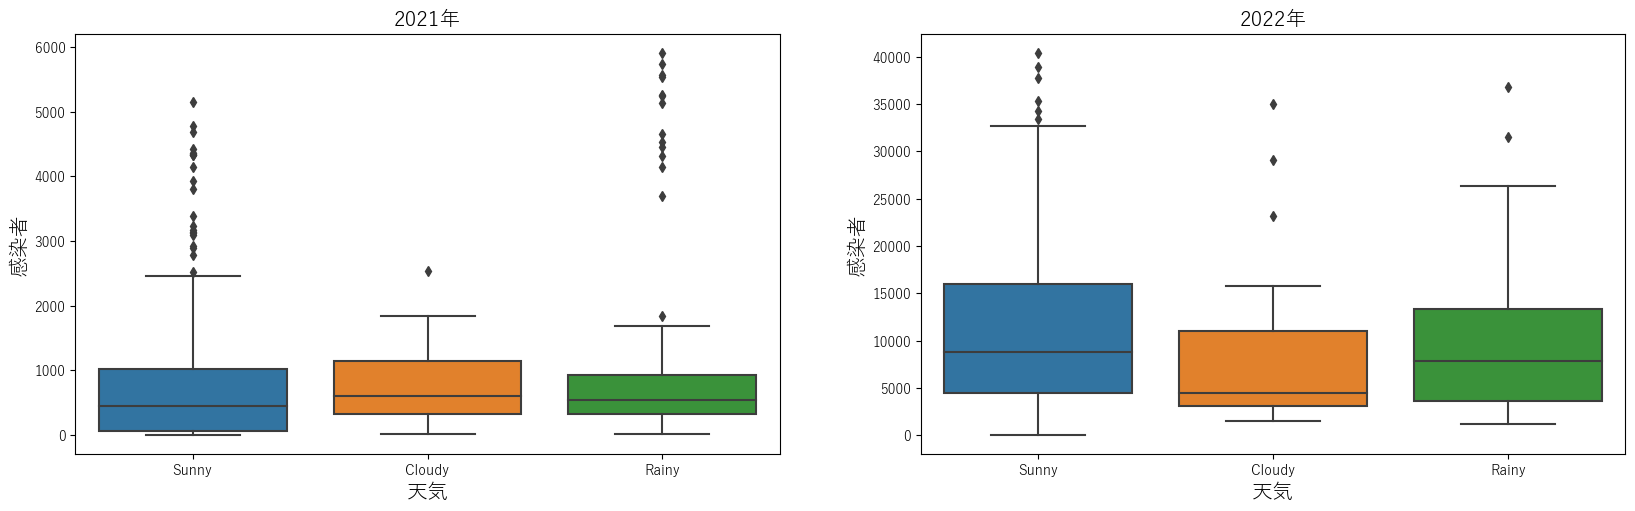

In [22]:
# 箱ひげ図
box_plot(df_outmon, "天気")

- y軸のスケールが違うことに注意
- 2021年では晴れの日と雨の日で極端に感染者数の多い日が多く存在するとわかる

### 3-3-3. 降水量と感染者数の関係を調べる

In [23]:
# 相関関係を調べる
display(df_m2021[['降水量', '2021年 感染者数']].corr(), df_m2022[['降水量', '2022年 感染者数']].corr())

,降水量,2021年 感染者数
降水量,1.000000,0.187583
2021年 感染者数,0.187583,1.000000


,降水量,2022年 感染者数
降水量,1.000000,0.019897
2022年 感染者数,0.019897,1.000000


各年とも降水量と感染者数との相関はほとんどなさそう

In [24]:
#---散布図を描画する関数
# 引数
# - data : 感染者数と気象データ結合後のデータフレーム
# - param : x軸に使う気象要素
# - order : x軸の気象要素の順番
def scatter_plot(data, param):
    fig = plt.figure(figsize=(20,12))
    for i, c in enumerate(year):
        ax = fig.add_subplot(2,2,i+1)
        ax.scatter(data[param].iloc[i*313: (i*313)+313], data['総感染者数'].iloc[i*313: (i*313)+313], alpha=0.5)
        ax.set_title(str(c)+'年', fontsize=15)
        ax.set_xlabel(param, fontsize=15)
        ax.set_ylabel('感染者数', fontsize=15)
    plt.show();

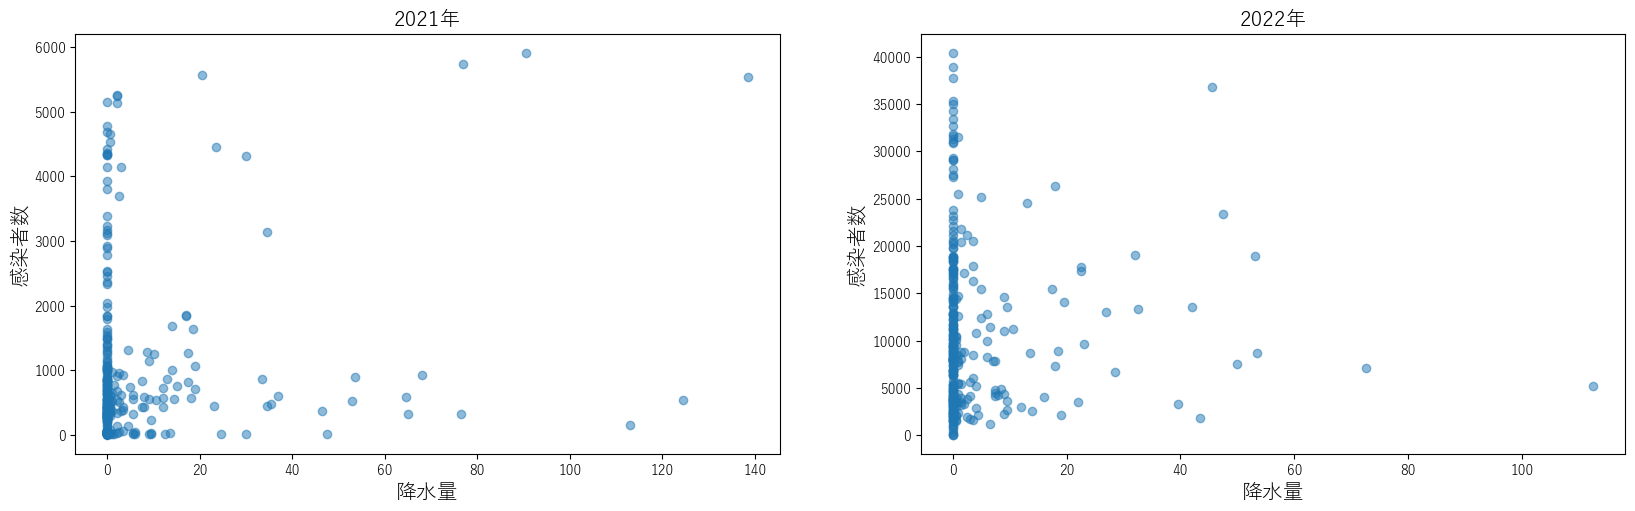

In [25]:
scatter_plot(df_outmon, '降水量')

- y軸のスケールが違うことに注意
- 2年とも降水量の最小値付近にプロットがまとまっており、ほとんど相関はなさそう

### 3-3-4. 日照時間と感染者数の関係を調べる

In [26]:
# 相関関係を調べる
display(df_m2021[['日照時間_rate', '2021年 感染者数']].corr(), df_m2022[['日照時間_rate', '2022年 感染者数']].corr())

,日照時間_rate,2021年 感染者数
日照時間_rate,1.000000,-0.101778
2021年 感染者数,-0.101778,1.000000


,日照時間_rate,2022年 感染者数
日照時間_rate,1.000000,0.059069
2022年 感染者数,0.059069,1.000000


2年ともほとんど相関がみられない

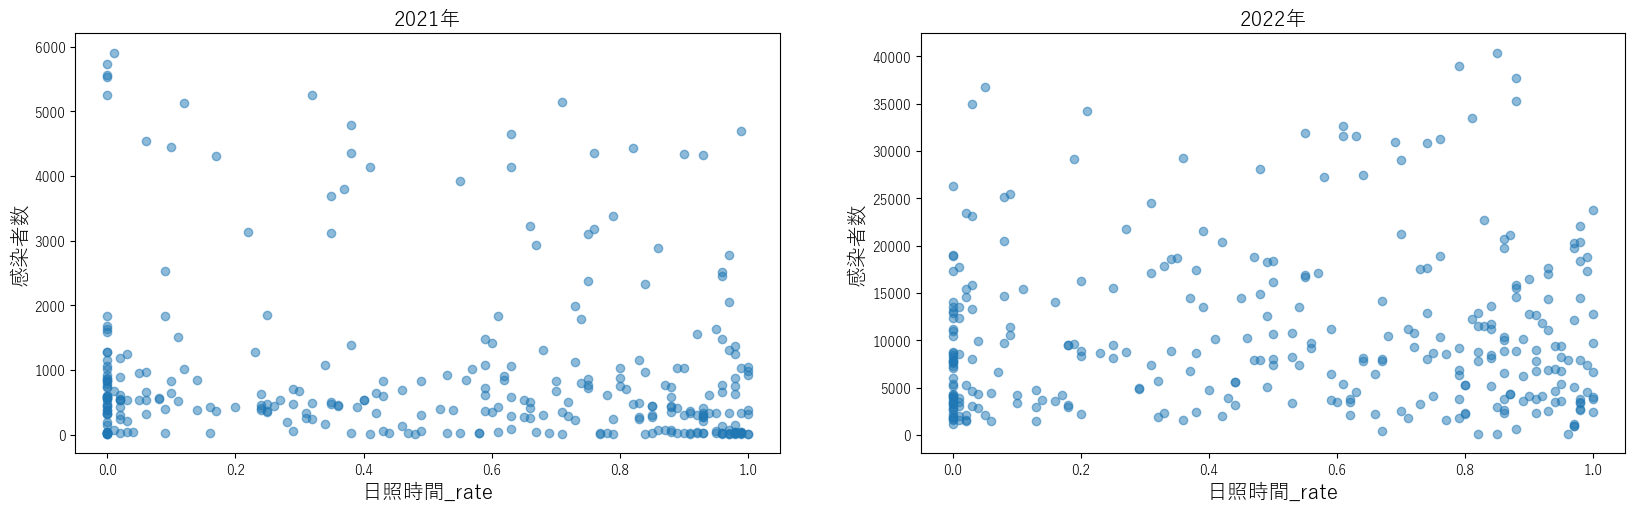

In [27]:
scatter_plot(df_outmon, '日照時間_rate')

- 各年度でy軸のスケールが違うことに注意
- 2年ともばらついており、相関が確認できない

### 3-3-5. 気温と感染者数の関係を調べる

In [28]:
# 相関関係を調べる
display(df_m2021[['平均気温', '最高気温', '最低気温', '2021年 感染者数']].corr(), 
        df_m2022[['平均気温', '最高気温', '最低気温', '2022年 感染者数']].corr())

,平均気温,最高気温,最低気温,2021年 感染者数
平均気温,1.000000,0.979320,0.983764,0.454360
最高気温,0.979320,1.000000,0.934584,0.427003
最低気温,0.983764,0.934584,1.000000,0.465422
2021年 感染者数,0.454360,0.427003,0.465422,1.000000


,平均気温,最高気温,最低気温,2022年 感染者数
平均気温,1.000000,0.985028,0.987075,0.192694
最高気温,0.985028,1.000000,0.950986,0.180276
最低気温,0.987075,0.950986,1.000000,0.201213
2022年 感染者数,0.192694,0.180276,0.201213,1.000000


感染者数と各気温要素において、2021年ではかなりの相関がみられるが2022年ではほとんど相関がみられない

In [29]:
# 気温要素と各年の感染者数をまとめたデータフレームをつくる
df_m2021_temp = df_m2021[['平均気温', '最高気温', '最低気温', '2021年 感染者数']]
df_m2022_temp = df_m2022[['平均気温', '最高気温', '最低気温', '2022年 感染者数']]

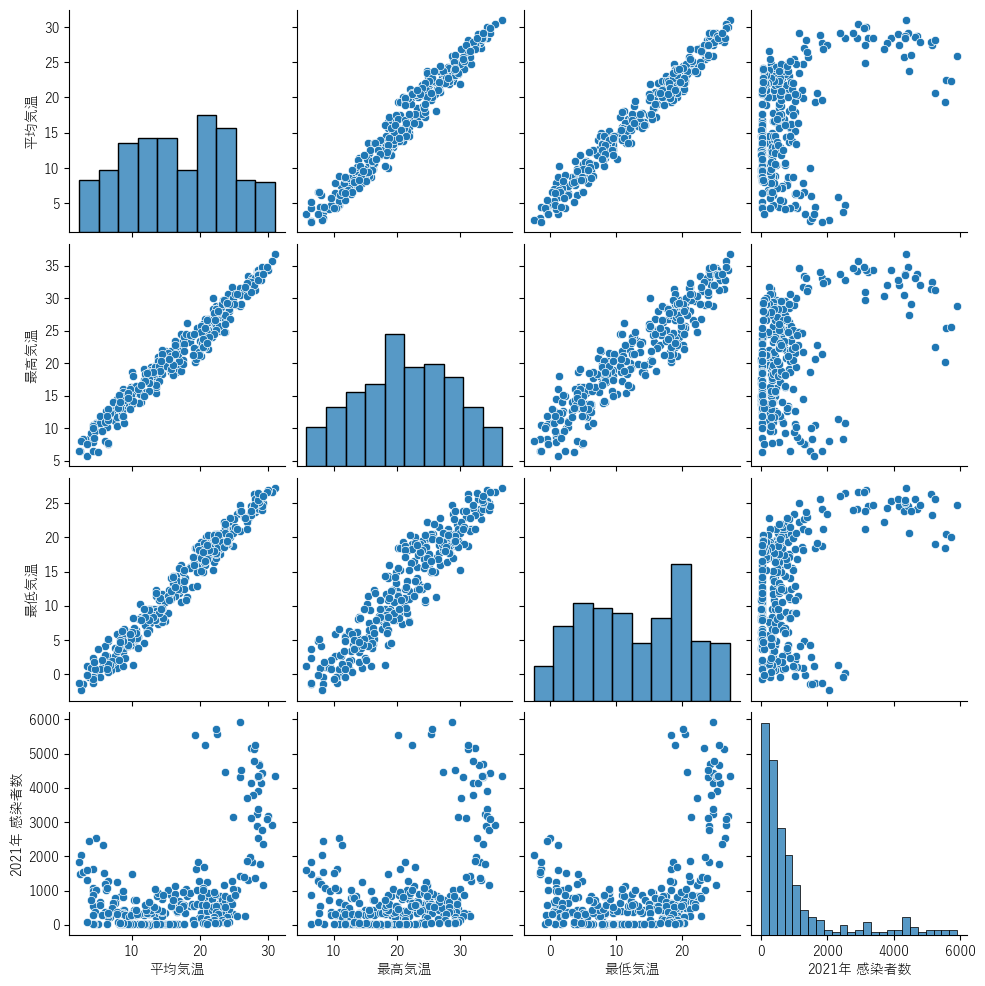

In [30]:
sns.pairplot(df_m2021_temp);

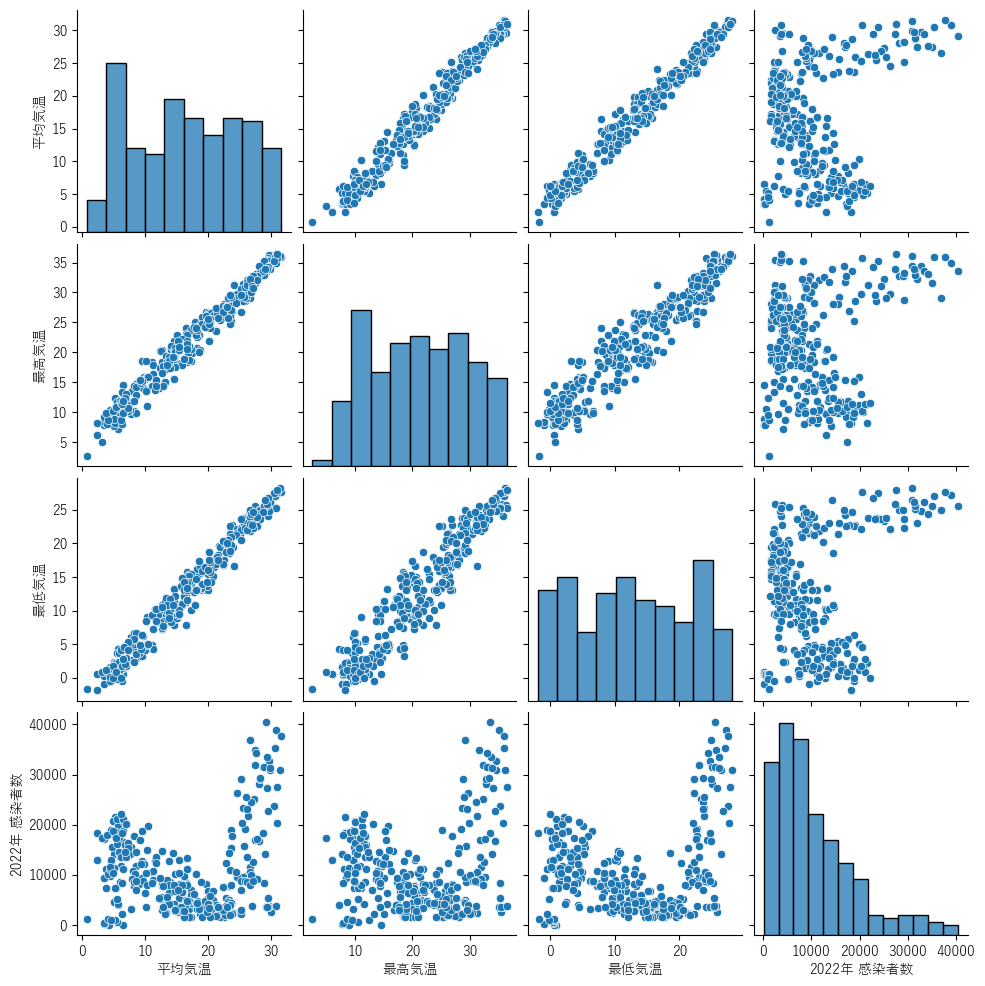

In [31]:
sns.pairplot(df_m2022_temp);

- 各年度でy軸のスケールが違うことに注意
- 2年とも気温の最小値、最大値付近で感染者数が多くなっている

### 3-3-6. 風速と感染者数の関係を調べる

In [32]:
# 相関関係を調べる
display(df_m2021[['平均風速', '最大風速','最大瞬間風速', '2021年 感染者数']].corr(), 
        df_m2022[['平均風速', '最大風速','最大瞬間風速', '2022年 感染者数']].corr())

,平均風速,最大風速,最大瞬間風速,2021年 感染者数
平均風速,1.000000,0.836961,0.799357,0.113149
最大風速,0.836961,1.000000,0.934639,0.093081
最大瞬間風速,0.799357,0.934639,1.000000,0.044068
2021年 感染者数,0.113149,0.093081,0.044068,1.000000


,平均風速,最大風速,最大瞬間風速,2022年 感染者数
平均風速,1.000000,0.846343,0.823286,0.143887
最大風速,0.846343,1.000000,0.928710,0.083550
最大瞬間風速,0.823286,0.928710,1.000000,0.048228
2022年 感染者数,0.143887,0.083550,0.048228,1.000000


各年とも感染者数と風速との相関はほとんどなさそう

In [33]:
# 気温要素と各年の感染者数をまとめたデータフレームをつくる
df_m2021_wind = df_m2021[['平均風速', '最大風速','最大瞬間風速', '2021年 感染者数']]
df_m2022_wind = df_m2022[['平均風速', '最大風速','最大瞬間風速', '2022年 感染者数']]

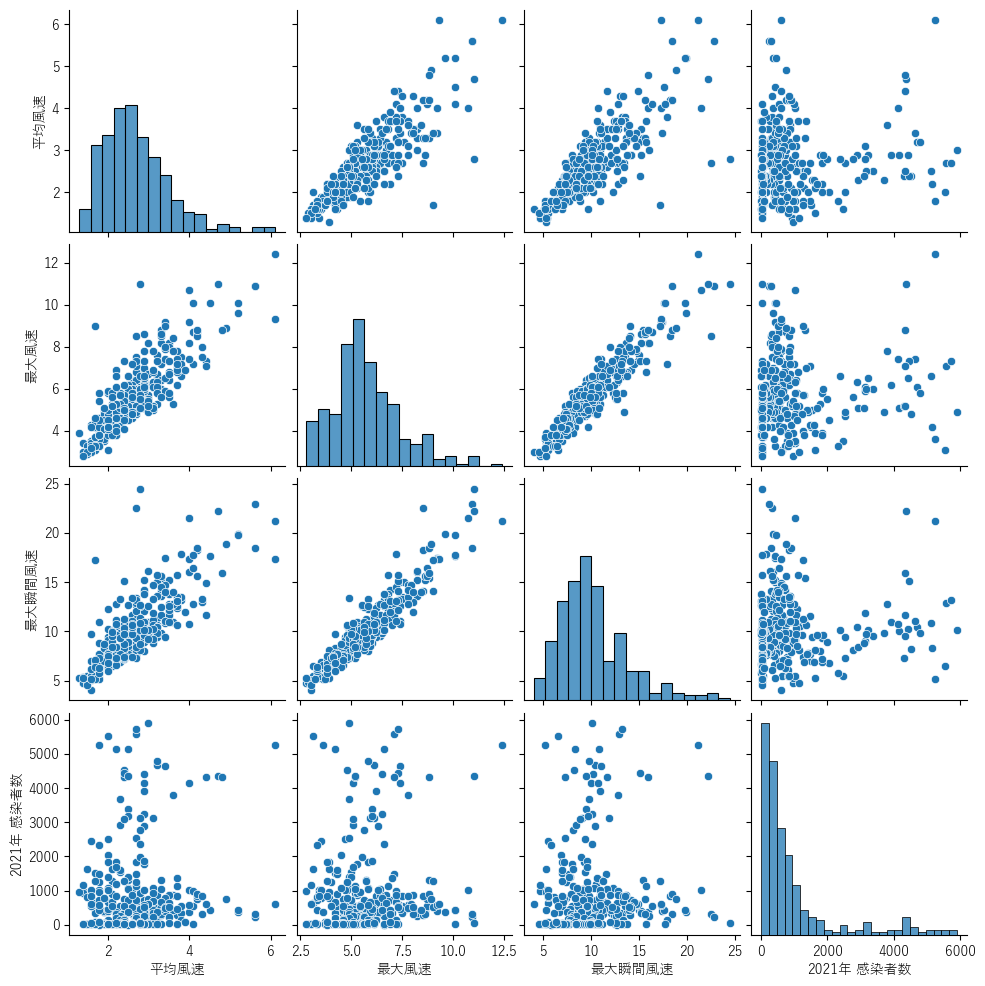

In [34]:
sns.pairplot(df_m2021_wind);

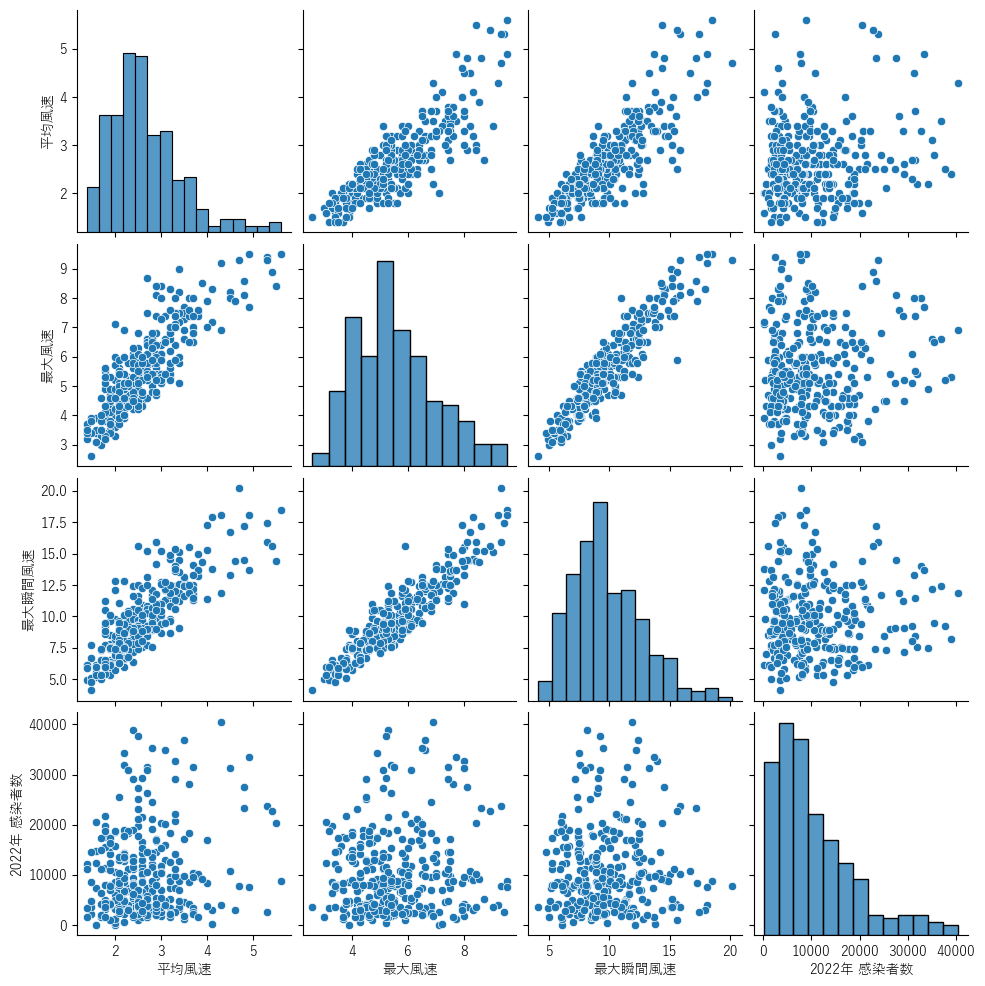

In [35]:
sns.pairplot(df_m2022_wind);

- 各年度でy軸のスケールが違うことに注意
- 2年ともばらつきが大きいことがわかる

### 3-3-7. 湿度と感染者数との関係を調べる

In [36]:
# 相関関係を調べる
display(df_m2021[['平均湿度', '最小相対湿度', '2021年 感染者数']].corr(), 
        df_m2022[['平均湿度', '最小相対湿度', '2022年 感染者数']].corr())

,平均湿度,最小相対湿度,2021年 感染者数
平均湿度,1.000000,0.930588,0.241044
最小相対湿度,0.930588,1.000000,0.277012
2021年 感染者数,0.241044,0.277012,1.000000


,平均湿度,最小相対湿度,2022年 感染者数
平均湿度,1.000000,0.897578,-0.013428
最小相対湿度,0.897578,1.000000,0.056403
2022年 感染者数,-0.013428,0.056403,1.000000


湿度と感染者数の関係は、2021年では弱い相関がみられるが2022年ではほとんど相関がみられない

In [37]:
# 湿度要素と各年の感染者数をまとめたデータフレームをつくる
df_m2021_hum = df_m2021[['平均湿度', '最小相対湿度', '2021年 感染者数']]
df_m2022_hum = df_m2022[['平均湿度', '最小相対湿度', '2022年 感染者数']]

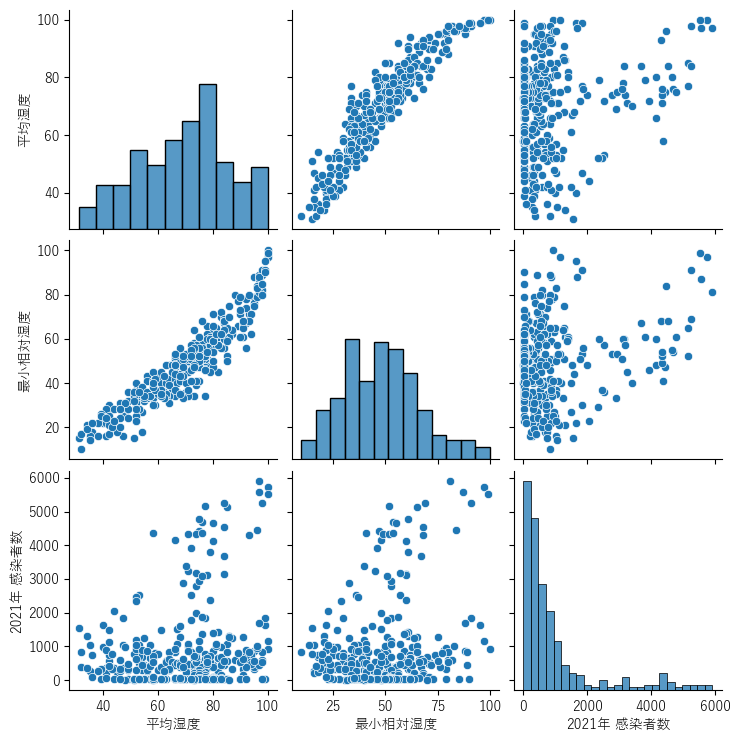

In [38]:
sns.pairplot(df_m2021_hum);

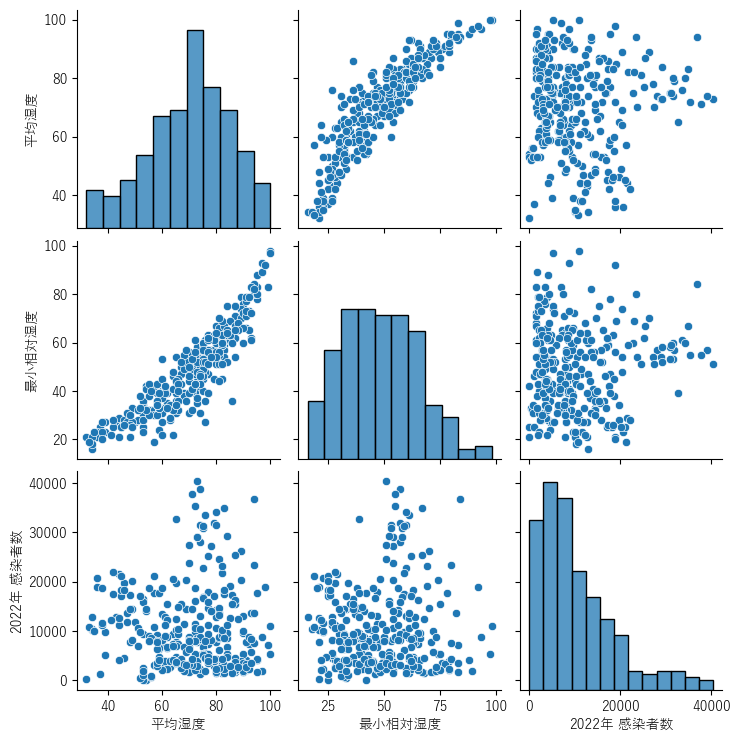

In [39]:
sns.pairplot(df_m2022_hum);

- 各年度でy軸のスケールが違うことに注意
- 2021年では感染者数が少ないところにプロットが集まっているが、弱い正の相関も確認できる
- 2022年ではデータがばらついており、ほとんど相関がないとわかる

### ここまでのまとめ

- 2021年は各気象要素との相関関係が認められるが、2022年はほとんど相関関係がない
    - 感染者数が多くなりすぎると気象要素と感染者数の関係が弱まる可能性がある
    - 2022年は感染者数が急増し、増加する感染者に対してPCR検査が追いついていなかったため気象との関連が薄れた可能性もある
    - 以上の理由から2022年の感染者数は各気象要素と無相関であると判断し、**2022年のデータを除いて機械学習で分析する**

- 2021年、2022年ともに降水量や天気との相関はほとんどなかった
    - 先ほど分析した月ごとの感染者数データの予想と異なった
    - 夏と冬は一般的に長期休暇をとる人が多いため、その時期は天気に関わらず多くの人が外出している可能性がある

- 2021年は気温と感染者数の相関関係がかなり強い
    - 特に気温の最小値、最大値付近で感染者数が多くなっていることが興味深い
    - 人出が活発化するのは夏と冬であることの裏付けにもなる

# 4. 感染者数を気象データでモデリング

## 4-1. 特徴選択

### 4-1-1. フィルター法

まず全体的な相関係数をみる

In [4]:
# 必要な要素に絞り込む
display(df_m2021[['平均気温', '最高気温', '最低気温', '降水量', '平均風速', '最大風速', '平均湿度', '最大瞬間風速',
                  '最小相対湿度', '日照時間_rate', '2021年 感染者数']].corr()
       )

,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大瞬間風速,最小相対湿度,日照時間_rate,2021年 感染者数
平均気温,1.000000,0.979320,0.983764,0.106956,0.133578,0.113319,0.561359,0.016771,0.491892,-0.207444,0.454360
最高気温,0.979320,1.000000,0.934584,0.033509,0.146520,0.149013,0.452724,0.039843,0.354147,-0.061663,0.427003
最低気温,0.983764,0.934584,1.000000,0.168981,0.110821,0.074974,0.635910,-0.006730,0.584287,-0.321413,0.465422
降水量,0.106956,0.033509,0.168981,1.000000,0.051048,0.060001,0.463718,0.155503,0.481861,-0.389008,0.187583
平均風速,0.133578,0.146520,0.110821,0.051048,1.000000,0.836961,-0.141787,0.799357,-0.146794,0.050662,0.113149
最大風速,0.113319,0.149013,0.074974,0.060001,0.836961,1.000000,-0.143119,0.934639,-0.183281,0.079096,0.093081
平均湿度,0.561359,0.452724,0.635910,0.463718,-0.141787,-0.143119,1.000000,-0.127584,0.930588,-0.684797,0.241044
最大瞬間風速,0.016771,0.039843,-0.006730,0.155503,0.799357,0.934639,-0.127584,1.000000,-0.163968,0.013169,0.044068
最小相対湿度,0.491892,0.354147,0.584287,0.481861,-0.146794,-0.183281,0.930588,-0.163968,1.000000,-0.734689,0.277012
日照時間_rate,-0.207444,-0.061663,-0.321413,-0.389008,0.050662,0.079096,-0.684797,0.013169,-0.734689,1.000000,-0.101778


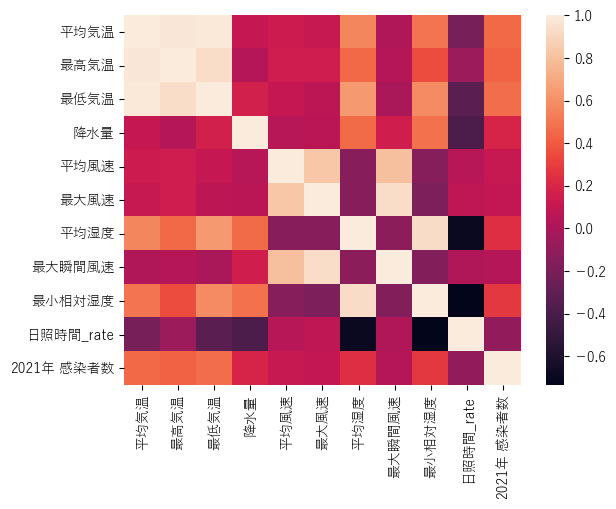

In [5]:
sns.heatmap(df_m2021[['平均気温', '最高気温', '最低気温', '降水量', '平均風速', '最大風速', '平均湿度', '最大瞬間風速',
                  '最小相対湿度', '日照時間_rate', '2021年 感染者数']].corr()
           )
plt.show()

- 平均気温と最高気温は最低気温と似た要素であるため、感染者数との相関が一番高い最低気温のみを残し、それ以外の気温要素は削除
- 降水量、平均風速、最大風速、最大瞬間風速、日照時間_rateは感染者数とほとんど相関がないため削除
- 平均湿度、最小相対湿度は似た要素であるため、より感染者数との相関が高い最小相対湿度を残し、平均湿度は削除

In [6]:
df_m2021_filter = df_m2021.drop(columns=['平均気温', '最高気温', '降水量', '平均風速', '最大風速', '平均湿度','最大1時間降水量',
                                         '最大瞬間風速','日照時間_rate', 'year', 'month', 'day', 'weekday']
                               )
df_m2021_filter.head()

,Date,最低気温,最小相対湿度,天気,2021年 感染者数
0,2021-01-01,3.4,30,Sunny,793
1,2021-01-02,6.2,49,Sunny,829
2,2021-01-03,4.3,51,Sunny,826
4,2021-01-05,-0.2,21,Sunny,1315
5,2021-01-06,-1.3,22,Sunny,1640


### 4-1-2. ラッパー法

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

In [8]:
# 使わない気象要素を削除
df_m2021_select = df_m2021.drop(columns=['Date', 'year', 'month', 'day', 'weekday', '天気'])
df_m2021_select.head()

,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate,2021年 感染者数
0,7.8,12.7,3.4,0.0,1.9,3.9,59,0.0,7.4,30,0.74,793
1,8.5,13.5,6.2,0.0,1.6,3.5,72,0.0,5.6,49,0.43,829
2,8.7,13.1,4.3,0.0,1.6,3.4,66,0.0,6.1,51,0.49,826
4,3.4,7.6,-0.2,0.0,3.3,8.8,34,0.0,15.4,21,0.97,1315
5,4.4,10.5,-1.3,0.0,1.5,3.1,40,0.0,5.3,22,0.95,1640


In [9]:
#  無相関化を行う
cov = np.cov(df_m2021_select, rowvar=0) # 分散・共分散を求める
_, S = np.linalg.eig(cov)           # 分散共分散行列の固有ベクトルを用いて
m2021_decorr = np.dot(S.T, df_m2021_select.T).T #データを無相関化

In [10]:
stdsc = StandardScaler()
stdsc.fit(m2021_decorr)
m2021_whitening  = stdsc.transform(m2021_decorr) # 無相関化したデータに対して、さらに標準化

In [11]:
# データフレームに直すとカラムがリセットされるため再設定する
df_m2021_whitening = pd.DataFrame(m2021_whitening)
df_m2021_whitening.columns =  ['平均気温', '最高気温', '最低気温', '降水量', '平均風速', '最大風速','平均湿度',
                               '最大1時間降水量', '最大瞬間風速','最小相対湿度', '日照時間_rate', '2021年 感染者数']
df_m2021_whitening.head()

,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate,2021年 感染者数
0,0.114966,-0.869067,0.482157,0.796749,1.305388,1.153390,0.301784,0.617211,0.576897,-0.419571,0.510865,0.319877
1,0.086547,-0.097853,-0.096675,1.501483,0.795471,1.103594,0.151951,0.459565,0.024436,0.926553,-2.083521,-0.097146
2,0.088920,-0.193593,0.007200,1.624661,-0.423077,0.751922,-0.190964,-0.779367,0.637313,-0.200798,0.332967,-0.106044
3,-0.295520,-1.843374,1.317131,0.940246,-1.058808,-1.618756,-0.048552,1.076204,-0.738795,2.352524,0.313767,1.302748
4,-0.551185,-1.752349,1.140215,1.130694,-0.480480,1.641723,-0.350686,-0.789629,0.647530,-0.173011,0.149162,-0.333653


In [12]:
# カラムが正しく再設定されたか確認
df_m2021_select.columns == df_m2021_whitening.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [13]:
# estimatorにモデルをセット
# 今回は回帰問題であるためLinearRegressionを使用
estimator = LinearRegression()

# RFECVは交差検証によってステップワイズ法による特徴選択を行う
# cvにはFold（=グループ）の数，scoringには評価指標を指定する
# 今回は回帰なのでneg_mean_squared_errorを評価指標に指定
rfecv = RFECV(estimator, cv=10, scoring='neg_mean_squared_error')

In [14]:
train_label = pd.DataFrame(df_m2021_whitening.iloc[:, -1])
train_data = df_m2021_whitening.iloc[:, :-1]
print(df_m2021_whitening.columns)

X = stdsc.fit_transform(train_data.values)
y = stdsc.fit_transform(train_label.values)


# fitで特徴選択を実行
rfecv.fit(X, y)

Index(['平均気温', '最高気温', '最低気温', '降水量', '平均風速', '最大風速', '平均湿度', '最大1時間降水量',
       '最大瞬間風速', '最小相対湿度', '日照時間_rate', '2021年 感染者数'],
      dtype='object')


RFECV(cv=10, estimator=LinearRegression(), scoring='neg_mean_squared_error')

In [15]:
# 特徴のランキングを表示（1が最も重要な特徴）
print('Feature ranking: \n{}'.format(rfecv.ranking_))

Feature ranking: 
[ 9 10  8  5  7 11  6  2  4  3  1]


In [16]:
# rfecv.support_でランキング1位以外はFalseとするindexを取得
# Trueになっている特徴を使用すれば汎化誤差は最小となる
rfecv.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True])

In [17]:
# ここでTrueになっている特徴が削除してもよい特徴
remove_idx = ~rfecv.support_
remove_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

In [18]:
# 削除してもよい特徴の名前を取得する
remove_feature = train_data.columns[remove_idx]
remove_feature

Index(['平均気温', '最高気温', '最低気温', '降水量', '平均風速', '最大風速', '平均湿度', '最大1時間降水量',
       '最大瞬間風速', '最小相対湿度'],
      dtype='object')

In [19]:
# drop関数で特徴を削除
selected_train_data = train_data.drop(remove_feature, axis=1)
selected_train_data.head()

,日照時間_rate
0,0.510865
1,-2.083521
2,0.332967
3,0.313767
4,0.149162


説明変数として適切なものは日照時間_rateだけだという結果が返ってきた

この結果から、感染者数と今回の分析で用意した気象要素との関係は単回帰で表せることができる可能性ある

後の線形回帰分析では日照時間_rateのみを採用する単回帰分析と、この説明変数とフィルター法で採用した説明変数、ダミー変数化した質的変数を組み合わせた重回帰分析の2つを行う

## 4-2. 機械学習

### 4-2-1. 線形回帰

In [20]:
# scikit-learnから線形回帰と評価関数をインポート
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [21]:
# ダミー変数化
df_m2021_d = pd.get_dummies(df_m2021)
df_m2021_d.head()

,Date,平均気温,最高気温,最低気温,降水量,平均風速,最大風速,平均湿度,最大1時間降水量,最大瞬間風速,最小相対湿度,日照時間_rate,2021年 感染者数,year,month,day,weekday,天気_Cloudy,天気_Rainy,天気_Sunny
0,2021-01-01,7.8,12.7,3.4,0.0,1.9,3.9,59,0.0,7.4,30,0.74,793,2021,1,1,4,0,0,1
1,2021-01-02,8.5,13.5,6.2,0.0,1.6,3.5,72,0.0,5.6,49,0.43,829,2021,1,2,5,0,0,1
2,2021-01-03,8.7,13.1,4.3,0.0,1.6,3.4,66,0.0,6.1,51,0.49,826,2021,1,3,6,0,0,1
4,2021-01-05,3.4,7.6,-0.2,0.0,3.3,8.8,34,0.0,15.4,21,0.97,1315,2021,1,5,1,0,0,1
5,2021-01-06,4.4,10.5,-1.3,0.0,1.5,3.1,40,0.0,5.3,22,0.95,1640,2021,1,6,2,0,0,1


#### 単回帰分析

In [22]:
# 必要な要素に絞る
use_cols_s = ['Date', '日照時間_rate', '2021年 感染者数']
df_m2021_s = df_m2021_d[use_cols_s]

In [23]:
# 日付情報からtrainとvalidationに分割
train_s = df_m2021_s.iloc[: 157]
val_s = df_m2021_s.iloc[157 :]
train_s.shape, val_s.shape

((157, 3), (156, 3))

In [24]:
X_train_s = train_s.drop(columns=['Date','2021年 感染者数'])
y_train_s = train_s['2021年 感染者数']
X_val_s = val_s.drop(columns=['Date','2021年 感染者数'])
y_val_s = val_s['2021年 感染者数']

In [25]:
# モデルの学習
lr = LinearRegression()
lr.fit(X_train_s, y_train_s)

# 予測
y_pred_lr_s = lr.predict(X_val_s)

# 評価
rmse = np.sqrt(mean_squared_error(y_val_s, y_pred_lr_s))
mae = mean_absolute_error(y_val_s, y_pred_lr_s)
print(f'RMSE : {rmse:.3f}, MAE : {mae:.3f}')

RMSE : 1806.751, MAE : 1242.204


単回帰分析では誤差が大きい

#### 重回帰分析

In [26]:
# 多重共線性を回避するためにダミー変数の1つ(天気_Cloudy)を削除
use_cols_m = ['Date', '最低気温', '最小相対湿度', '日照時間_rate', '2021年 感染者数', '天気_Rainy', '天気_Sunny']
df_m2021_m = df_m2021_d[use_cols_m]

In [27]:
# 日付情報からtrainとvalidationに分割
train_m = df_m2021_m.iloc[: 157]
val_m = df_m2021_m.iloc[157 :]
train_m.shape, val_m.shape

((157, 7), (156, 7))

In [28]:
X_train_m = train_m.drop(columns=['Date','2021年 感染者数'])
y_train_m = train_m['2021年 感染者数']
X_val_m = val_m.drop(columns=['Date','2021年 感染者数'])
y_val_m = val_m['2021年 感染者数']

In [29]:
# モデルの学習
lr.fit(X_train_m, y_train_m)

# 予測
y_pred_lr_m = lr.predict(X_val_m)

# 評価
rmse = np.sqrt(mean_squared_error(y_val_m, y_pred_lr_m))
mae = mean_absolute_error(y_val_m, y_pred_lr_m)
print(f'RMSE : {rmse:.3f}, MAE : {mae:.3f}')

RMSE : 1910.153, MAE : 1318.107


重回帰分析でも誤差が大きい(説明変数が1つの単回帰の方がやや予測精度が高い)

### 4-2-2. ランダムフォレスト

In [30]:
# scikit-learnからランダムフォレストをインポート
from sklearn.ensemble import RandomForestRegressor

In [31]:
# ランダムフォレストは説明変数をすべて入れてみる
df_m2021_d.drop(columns=['year', 'month', 'day', 'weekday'], inplace=True)
# 日付情報からtrainとvalidationに分割
train_d = df_m2021_d.iloc[: 157]
val_d = df_m2021_d.iloc[157 :]
train_d.shape, val_d.shape

((157, 16), (156, 16))

In [32]:
X_train_d = train_d.drop(columns=['Date','2021年 感染者数'])
y_train_d = train_d['2021年 感染者数']
X_val_d = val_d.drop(columns=['Date','2021年 感染者数'])
y_val_d = val_d['2021年 感染者数']

In [33]:
# モデルの学習
rf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)# 学習の再現性を確保するため、randam_stateは固定
rf.fit(X_train_d, y_train_d)

# 予測
y_pred_rf = rf.predict(X_val_d)

# 評価
rmse = np.sqrt(mean_squared_error(y_val_d, y_pred_rf))
mae = mean_absolute_error(y_val_d, y_pred_rf)
print(f'RMSE : {rmse:.3f}, MAE : {mae:.3f}')

RMSE : 1847.953, MAE : 1246.487


- ランダムフォレストでも誤差が大きい
- 単回帰分析のほうがやや予測精度が高い

### 4-2-3. 予測の様子を可視化

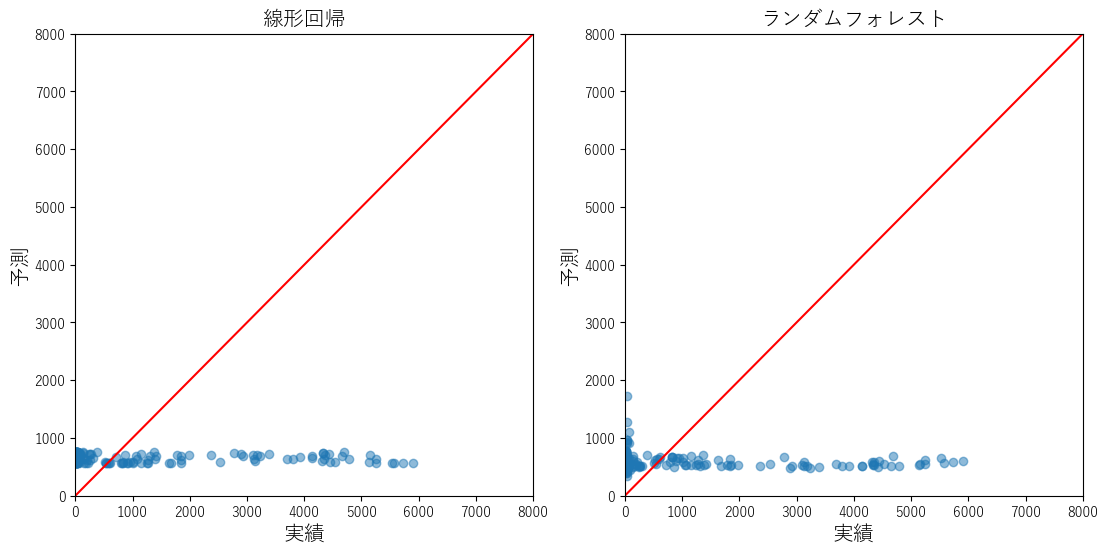

In [34]:
#-x軸・y軸の値の範囲
axis_range = (0,8000)

#-散布図
fig = plt.figure(figsize=(13,6))
# 線形回帰の結果を可視化(より誤差の小さかった単回帰分析のほうを採用)
ax = fig.add_subplot(1,2,1)
ax.scatter(y_val_s, y_pred_lr_s, alpha=0.5)
ax.plot(axis_range, axis_range, color='r')
ax.set_title('線形回帰', fontsize=15)
ax.set_xlabel('実績', fontsize=15)
ax.set_ylabel('予測', fontsize=15)
ax.set_xlim(axis_range)
ax.set_ylim(axis_range)
# ランダムフォレストの結果を可視化
ax = fig.add_subplot(1,2,2)
ax.scatter(y_val_d, y_pred_rf, alpha=0.5)
ax.plot(axis_range, axis_range, color='r')
ax.set_title('ランダムフォレスト', fontsize=15)
ax.set_xlabel('実績', fontsize=15)
ax.set_ylabel('予測', fontsize=15)
ax.set_xlim(axis_range)
ax.set_ylim(axis_range)
plt.show()

実際の感染者数に対してかなり低く予測している

In [36]:
# feature importanceを表示
pd.DataFrame(rf.feature_importances_,
             index=X_train_d.columns,
             columns=['重要度']).sort_values('重要度', ascending=False)

,重要度
平均気温,0.311704
最低気温,0.186302
最高気温,0.100441
最大瞬間風速,0.090855
最大風速,0.090154
日照時間_rate,0.062061
平均風速,0.057874
平均湿度,0.048989
最小相対湿度,0.036276
最大1時間降水量,0.005531


- 重要度の上位は気温、風速、日照時間がある
- 気温と日照時間については季節を示唆する特徴量であるが、風速についてはなぜ重要度の高い特徴量なのかが推測しにくい
    - より上位にいる最大瞬間風速と最大風速は強い風であることから、冬では西高東低の気圧配置による強風、夏では発達した積乱雲による突風が人流に影響を与えている可能性がある